In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
import os
import pickle
import gc
from tqdm import tqdm

Using TensorFlow backend.


In [2]:

def encode_text_features(encode_decode, data_frame, encoder_isa=None, encoder_mem_type=None):
    # Implement Categorical OneHot encoding for ISA and mem-type
    if encode_decode == 'encode':
        encoder_isa = ce.one_hot.OneHotEncoder(cols=['isa'])
        encoder_mem_type = ce.one_hot.OneHotEncoder(cols=['mem-type'])
        encoder_isa.fit(data_frame, verbose=1)
        df_new1 = encoder_isa.transform(data_frame)
        encoder_mem_type.fit(df_new1, verbose=1)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
    else:
        df_new1 = encoder_isa.transform(data_frame)
        df_new = encoder_mem_type.transform(df_new1)
        encoded_data_frame = df_new
        
    return encoded_data_frame, encoder_isa, encoder_mem_type

In [3]:
df = pd.read_csv('C:\\Users\\Rajat\\Desktop\\PROJECT_MODE\\Performance_Dataset\\Performance\\PhysicalSystems\\matmul_lab_omp.csv')

In [4]:
df.head()

,sys,arch,cpu-clock,isa,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,...,l3_cache_lines,l3_shared_by_threads,l3_size,mem-size,mem-type,mem_clock,num-cpus,PS,runtime,bus_speed
0,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,...,0,0,0,2,DDR2,667,1,300,363763.7640,2048
1,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,...,0,0,0,2,DDR2,667,2,300,337125.2407,2048
2,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,...,0,0,0,2,DDR2,667,3,300,332367.8424,2048
3,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,...,0,0,0,2,DDR2,667,4,300,332021.9051,2048
4,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,X86_64,8,64,1,32,2,64,...,0,0,0,2,DDR2,667,5,300,328559.8396,2048


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 23 columns):
sys                      280 non-null object
arch                     280 non-null object
cpu-clock                280 non-null float64
isa                      280 non-null object
l1d_assoc                280 non-null int64
l1d_cache_lines          280 non-null int64
l1d_shared_by_threads    280 non-null int64
l1d_size                 280 non-null int64
l2_assoc                 280 non-null int64
l2_cache_lines           280 non-null int64
l2_shared_by_threads     280 non-null int64
l2_size                  280 non-null int64
l3_assoc                 280 non-null int64
l3_cache_lines           280 non-null int64
l3_shared_by_threads     280 non-null int64
l3_size                  280 non-null int64
mem-size                 280 non-null int64
mem-type                 280 non-null object
mem_clock                280 non-null int64
num-cpus                 280 non-null int64
PS       

In [6]:
df.columns, len(df.columns)

(Index(['sys', 'arch', 'cpu-clock', 'isa', 'l1d_assoc', 'l1d_cache_lines',
        'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
        'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
        'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type', 'mem_clock',
        'num-cpus', 'PS', 'runtime', 'bus_speed'],
       dtype='object'), 23)

In [7]:
len(df)

280

In [8]:
encoded_data_frame, encoder_isa, encoder_mem_type = encode_text_features('encode', df, encoder_isa = None, encoder_mem_type=None)

In [9]:
encoded_data_frame.head()

,sys,arch,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,...,l3_size,mem-size,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,PS,runtime,bus_speed
0,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,...,0,2,1,0,0,667,1,300,363763.7640,2048
1,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,...,0,2,1,0,0,667,2,300,337125.2407,2048
2,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,...,0,2,1,0,0,667,3,300,332367.8424,2048
3,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,...,0,2,1,0,0,667,4,300,332021.9051,2048
4,ceptraining_student,IntelCore2Duo_DDR2667_2GB,1.6,1,8,64,1,32,2,64,...,0,2,1,0,0,667,5,300,328559.8396,2048


In [10]:
encoded_data_frame.columns

Index(['sys', 'arch', 'cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'runtime',
       'bus_speed'],
      dtype='object')

In [13]:
total_data = encoded_data_frame.drop(columns = ['arch', 'sys'])

In [14]:
total_data.columns

Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'runtime',
       'bus_speed'],
      dtype='object')

In [15]:
total_data = total_data.fillna(0)
temp = total_data
#.drop(columns = 'PS')

In [24]:
X_columns = total_data.drop(columns = 'runtime').columns
X = total_data.drop(columns = ['runtime']).to_numpy()
Y = total_data['runtime'].to_numpy()

In [25]:
X_columns

Index(['cpu-clock', 'isa_1', 'l1d_assoc', 'l1d_cache_lines',
       'l1d_shared_by_threads', 'l1d_size', 'l2_assoc', 'l2_cache_lines',
       'l2_shared_by_threads', 'l2_size', 'l3_assoc', 'l3_cache_lines',
       'l3_shared_by_threads', 'l3_size', 'mem-size', 'mem-type_1',
       'mem-type_2', 'mem-type_3', 'mem_clock', 'num-cpus', 'PS', 'bus_speed'],
      dtype='object')

In [26]:
X.shape, Y.shape

((280, 22), (280,))

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((224, 22), (56, 22), (224,), (56,))

In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# Y_train = scaler.fit_transform(Y_train)
# Y_test = scaler.fit_transform(Y_test)

# Histogram Visualization of Dataset

C:\Users\Rajat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Rajat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Rajat\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Rajat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until

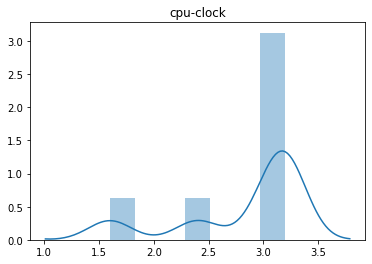

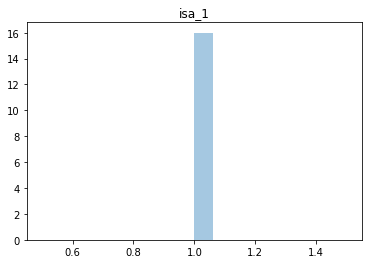

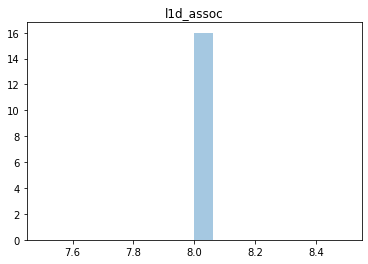

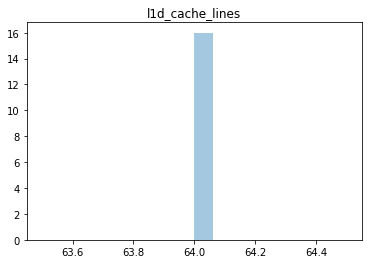

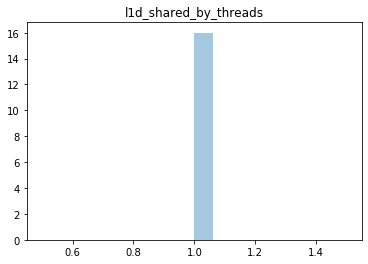

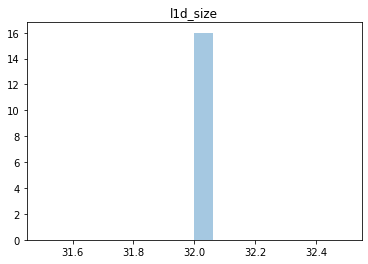

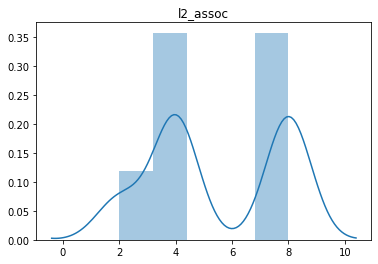

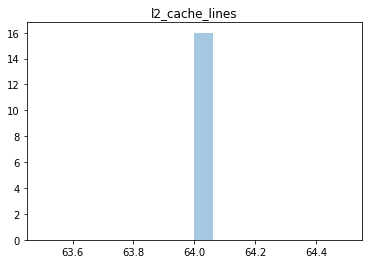

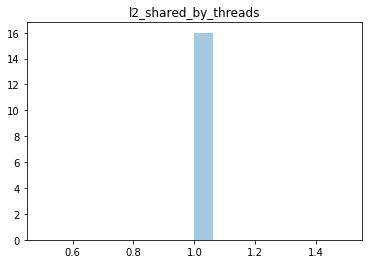

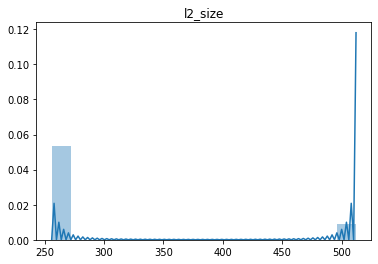

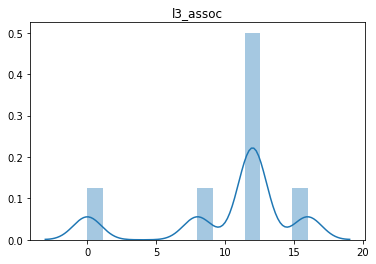

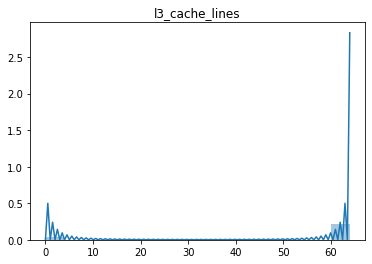

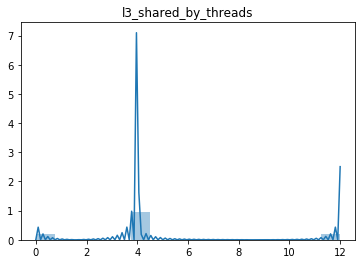

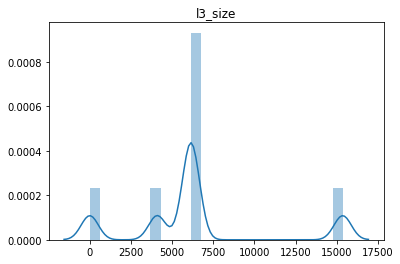

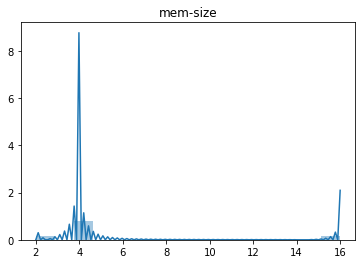

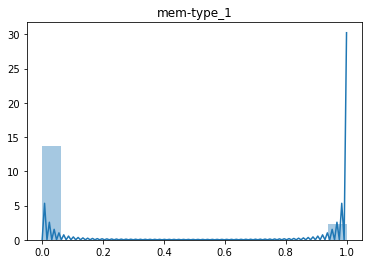

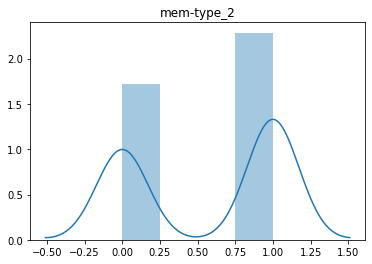

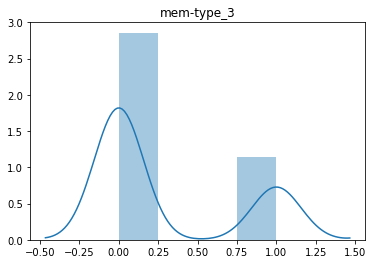

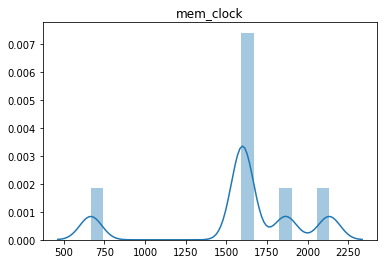

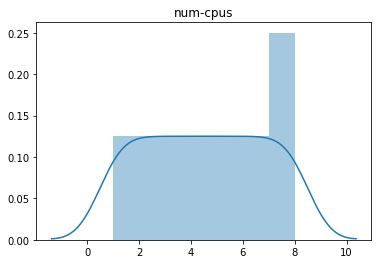

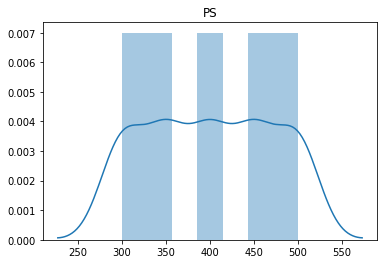

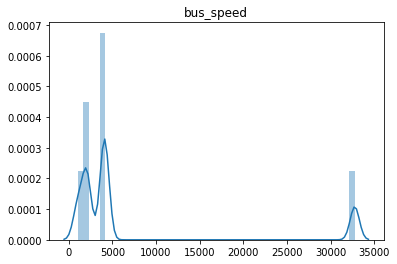

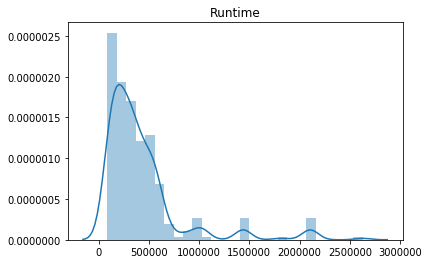

In [30]:
for i in range(X.shape[1]):
    plt.figure()
    plt.title(X_columns[i])
    sns.distplot(X[:,i]) # Also plots Gaussian KDE over data
plt.figure()
plt.title('Runtime')
sns.distplot(Y)

# Understanding Correlations

In [31]:
temp.head(100)

,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,...,l3_size,mem-size,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,PS,runtime,bus_speed
0,1.6,1,8,64,1,32,2,64,1,512,...,0,2,1,0,0,667,1,300,363763.7640,2048
1,1.6,1,8,64,1,32,2,64,1,512,...,0,2,1,0,0,667,2,300,337125.2407,2048
2,1.6,1,8,64,1,32,2,64,1,512,...,0,2,1,0,0,667,3,300,332367.8424,2048
3,1.6,1,8,64,1,32,2,64,1,512,...,0,2,1,0,0,667,4,300,332021.9051,2048
4,1.6,1,8,64,1,32,2,64,1,512,...,0,2,1,0,0,667,5,300,328559.8396,2048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.2,1,8,64,1,32,4,64,1,256,...,6144,4,0,0,1,2133,8,350,204332.3975,4096
96,3.2,1,8,64,1,32,4,64,1,256,...,6144,4,0,1,0,1600,1,350,146186.8881,1024
97,3.2,1,8,64,1,32,4,64,1,256,...,6144,4,0,1,0,1600,2,350,148884.4836,1024
98,3.2,1,8,64,1,32,4,64,1,256,...,6144,4,0,1,0,1600,3,350,156667.6449,1024


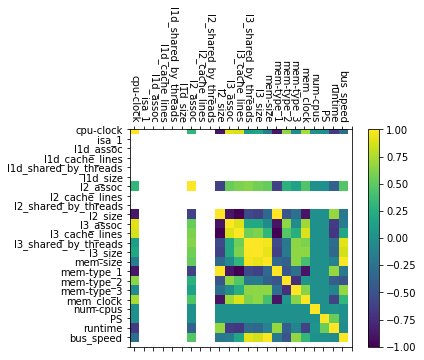

<Figure size 1440x1080 with 0 Axes>

In [32]:
train_data = temp
correlations = train_data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,24,1)
#ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_data.columns, rotation = -90)
ax.set_yticklabels(train_data.columns)
plt.figure(figsize=(20,15))
plt.show()

In [33]:
correlations

,cpu-clock,isa_1,l1d_assoc,l1d_cache_lines,l1d_shared_by_threads,l1d_size,l2_assoc,l2_cache_lines,l2_shared_by_threads,l2_size,...,l3_size,mem-size,mem-type_1,mem-type_2,mem-type_3,mem_clock,num-cpus,PS,runtime,bus_speed
cpu-clock,1.000000e+00,NaN,NaN,NaN,NaN,NaN,3.146710e-01,NaN,NaN,-8.799364e-01,...,1.912918e-01,-1.540098e-01,-8.799364e-01,6.511490e-01,-3.170213e-02,7.377192e-01,0.000000e+00,-2.518452e-18,-0.656782,-0.278262
isa_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_assoc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_cache_lines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_shared_by_threads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1d_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2_assoc,3.146710e-01,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,-6.030227e-01,...,5.713163e-01,5.310850e-01,-6.030227e-01,2.842676e-01,1.556998e-01,4.596511e-01,0.000000e+00,-9.895169e-18,-0.367695,0.467534
l2_cache_lines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2_shared_by_threads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2_size,-8.799364e-01,NaN,NaN,NaN,NaN,NaN,-6.030227e-01,NaN,NaN,1.000000e+00,...,-6.035422e-01,-3.202563e-01,1.000000e+00,-4.714045e-01,-2.581989e-01,-8.926465e-01,0.000000e+00,-5.127900e-19,0.685351,-0.198799


In [34]:
def absolute_percentage_error(Y_test, Y_pred):
    error = 0
    for i in range(len(Y_test)):
        if(Y_test[i]!= 0 ):
            error = error + (abs(Y_test[i] - Y_pred[i]))/Y_test[i]
        
    error = error/ len(Y_test)
    return error

# 1. Support Vector Regressor + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.156, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.071, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.029, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.156, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.071, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.029, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.156, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.071, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ...... C=0.1, gamma=0.01, kernel=rbf, score=-0.029, total=   0.0s
[CV] C

[CV] .... C=100, gamma=0.0001, kernel=rbf, score=-0.029, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ........ C=1000, gamma=1, kernel=rbf, score=-0.144, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ........ C=1000, gamma=1, kernel=rbf, score=-0.064, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ........ C=1000, gamma=1, kernel=rbf, score=-0.016, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ...... C=1000, gamma=0.1, kernel=rbf, score=-0.118, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ...... C=1000, gamma=0.1, kernel=rbf, score=-0.057, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.013, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.9s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
MSE =  71316732022.46547
R2 score = 0.04201623653091968
Mean Absolute Percentage Error is: 0.623334782857664
Mean Absolute Error is: 171177.11271955952


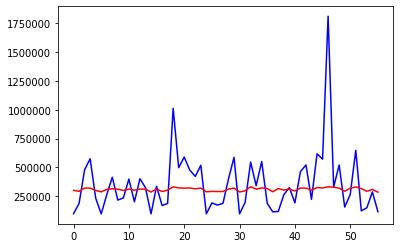

In [35]:
from sklearn.svm import SVR
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              # Regularization parameter. The strength of the regularization is inversely proportional to C. 
              # Must be strictly positive. The penalty is a squared l2 penalty.
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
              # if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
              # if ‘auto’, uses 1 / n_features.
              
              'kernel': ['rbf']} 
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred)) 
print('Mean Absolute Percentage Error is:',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))


# 10 fold cross validation for best SVR

KFold(n_splits=10, random_state=42, shuffle=True)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
MSE for 10 folds
 [39266143900.44583, 109406300348.85593, 78741431144.30733, 139967509255.40933, 321055770657.7161, 142516915052.50848, 597781521054.7523, 78735363199.50998, 187819969464.75165, 82275887062.90419]

R2 scores for 10 folds
 [0.024039865059164223, -0.023050431828715245, -0.019431920244238565, -0.16731461764642774, -0.14825704151479813, -0.059760485018445886, -0.16998780786871004, 0.0008566837539737415, -0.03315624967680986, -0.043496996317207826]

MAPE for 10 folds
 [0.7034412300950258, 0.6853256289950046, 0.6116737056055449, 0.524842773800304, 0.5705398852919253, 0.6525521510666286, 0.7207246171229327, 0.7048

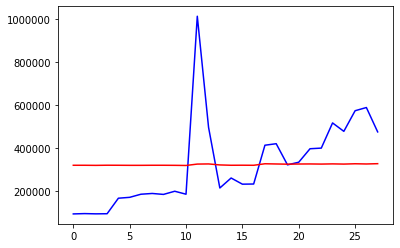

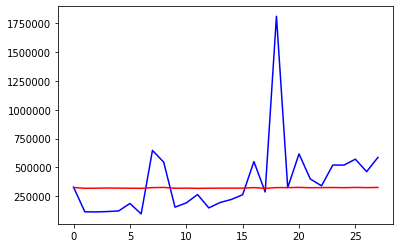

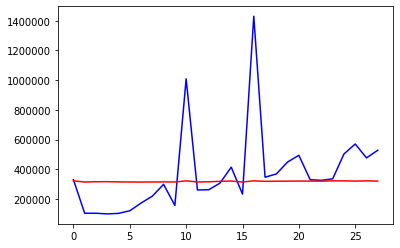

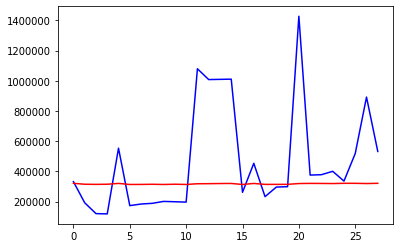

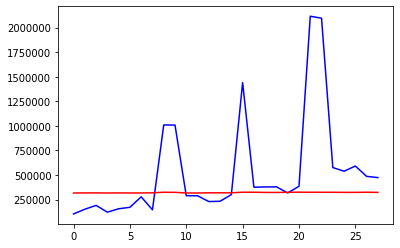

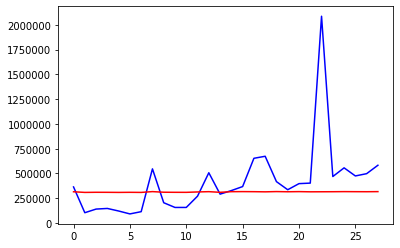

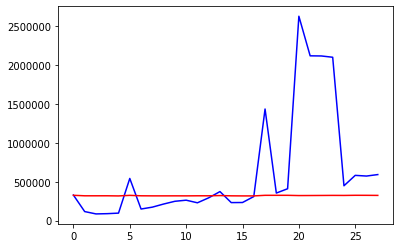

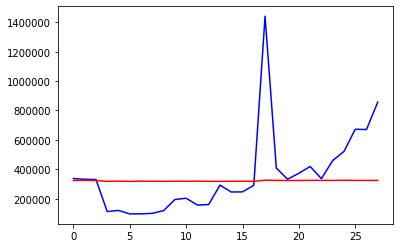

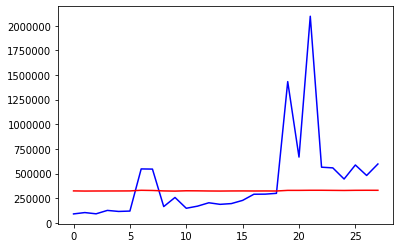

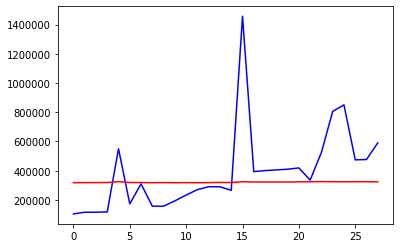

In [36]:
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
from sklearn.svm import SVR
best_svr = SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    best_svr.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = best_svr.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# SVR Analysis

## 0. Our best fit line is the line hyperplane that has maximum number of points. (SVR)
## 1. For linear kernel - Data should be linearly seperable - How to know this? - IF not working well, 
## 2. data must be linearly inseperable? 
## 3. C = 1000,-> Less Regularization was needed
## gamma = 0.1 -> Kernel Coefficient ,  rest default
## 4. SVM performs worse on highly skewed datasets (Can be seen by histograms)
## 5. Logistic regression works well on skewed datasets. (But this is a regression problem and logistic regression works great with classificaton problem)
## 6. How to prove whether given dataset is skewed and not linearly separable?
## 7. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

# 5. Gaussian Process Regressor (Marcov Chain Monte Carlo) + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ....... alpha=1e-10, normalize_y=True, score=0.915, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ....... alpha=1e-10, normalize_y=True, score=0.969, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] alpha=1e-10, normalize_y=True ...................................
[CV] ....... alpha=1e-10, normalize_y=True, score=0.976, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ...... alpha=1e-10, normalize_y=False, score=0.909, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ...... alpha=1e-10, normalize_y=False, score=0.964, total=   0.0s
[CV] alpha=1e-10, normalize_y=False ..................................
[CV] ...... alpha=1e-10, normalize_y=False, score=0.974, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ....... alpha=1e-09, normalize_y=True, score=0.915, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ....... alpha=1e-09, normalize_y=True, score=0.969, total=   0.0s
[CV] alpha=1e-09, normalize_y=True ...................................
[CV] ....... alpha=1e-09, normalize_y=True, score=0.976, total=   0.0s
[CV] a

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s finished


{'alpha': 0.01, 'normalize_y': True}
GaussianProcessRegressor(alpha=0.01, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)
MSE =  29903175601.689808
R2 score = 0.5983164694989169

Mean Absolute Percentage Error = 0.18968549151350475
Mean Absolute Error is: 65027.34209736354


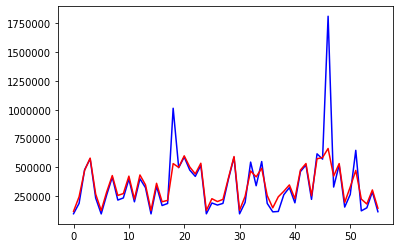

In [37]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0 , 
                               normalize_y= True, copy_X_train=True, random_state= None)
# defining parameter range 
param_grid = {'alpha': [1e-10, 1e-9, 1e-5, 1e-2],  
             'normalize_y' : [True, False],
                         } 
grid = GridSearchCV(gpr, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best Gaussian Process Regressor

KFold(n_splits=10, random_state=42, shuffle=True)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
MSE for 10 folds
 [3900083861.8022676, 30448053887.83069, 3395712023.290025, 25695675846.09781, 6389840941.427145, 21725520552.361137, 280250960829.6967, 4138888809.9966407, 6029745196.972979, 7270351711.671689]

R2 scores for 10 folds
 [0.903063402872063, 0.7152824418798207, 0.9560371563204784, 0.785700708792923, 0.9771467124228221, 0.8384483119820155, 0.4514882180772458, 0.9474779448122321, 0.9668317008464827, 0.9077908431725721]

MAPE for 10 folds
 [0.12174560832304196, 0.2947556951110041, 0.20041251066807572, 0.17643252463464845, 0.17001612199419766, 0.1648625816731357, 0.3167405857457569, 0.24503307924270884, 0.246453

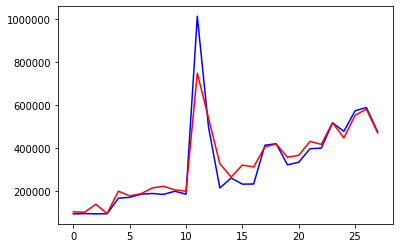

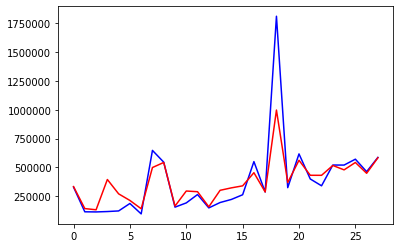

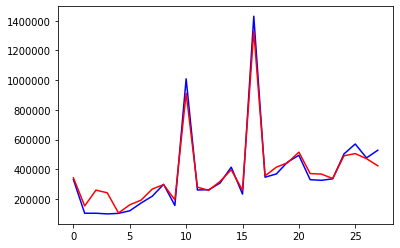

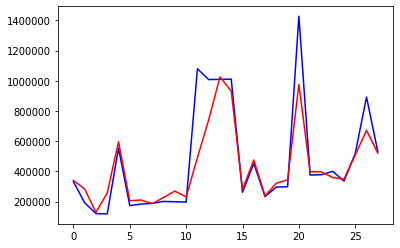

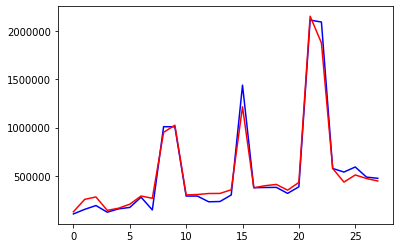

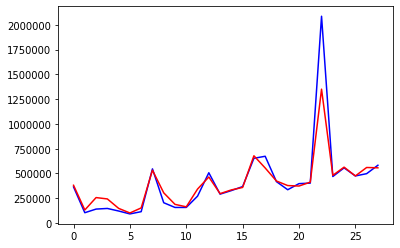

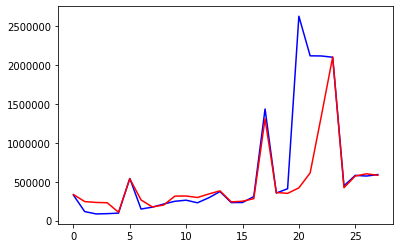

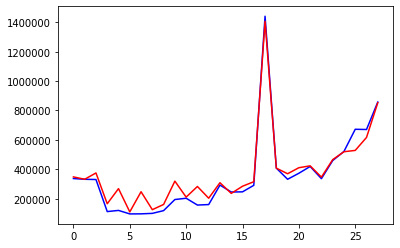

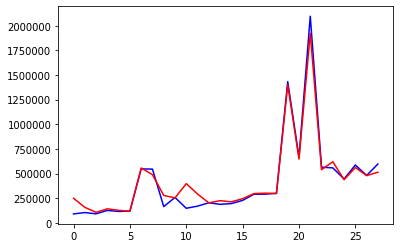

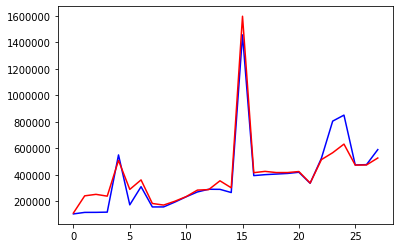

In [38]:
from sklearn.gaussian_process import GaussianProcessRegressor
gpr_best =GaussianProcessRegressor(alpha=0.01, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state = 42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    gpr_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = gpr_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')

    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 9. Gradient boosting regression + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 336 candidates, totalling 1008 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.885, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.828, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=10 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=10, score=0.840, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.913, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.943, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=20 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=20, score=0.962, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=50 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=50, score=0.901, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimators=50 ............
[CV]  criterion=mse, loss=ls, max_depth=3, n_estimators=50, score=0.975, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=3, n_estimato

[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=20, score=0.980, total=   0.0s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=50 ...........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=50, score=0.892, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=50 ...........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=50, score=0.984, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=50 ...........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=50, score=0.995, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=100 ..........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=100, score=0.890, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=100 ..........
[CV]  criterion=mse, loss=ls, max_depth=10, n_estimators=100, score=0.984, total=   0.1s
[CV] criterion=mse, loss=ls, max_depth=10, n_estimators=100 ..........
[CV]  criterion=mse, loss=ls, max_depth=10, 

[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=50, score=0.978, total=   0.2s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.943, total=   0.3s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.842, total=   0.3s
[CV] criterion=mse, loss=lad, max_depth=4, n_estimators=100 ..........
[CV]  criterion=mse, loss=lad, max_depth=4, n_estimators=100, score=0.992, total=   0.3s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5, n_estimators=10, score=0.183, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5, n_estimators=10, score=0.169, total=   0.0s
[CV] criterion=mse, loss=lad, max_depth=5, n_estimators=10 ...........
[CV]  criterion=mse, loss=lad, max_depth=5,

[CV]  criterion=mse, loss=lad, max_depth=15, n_estimators=100, score=0.990, total=   1.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=10 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=10, score=0.239, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=10 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=10, score=0.170, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=10 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=10, score=0.471, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=20 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=20, score=0.578, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=20 ........
[CV]  criterion=mse, loss=lad, max_depth=None, n_estimators=20, score=0.399, total=   0.1s
[CV] criterion=mse, loss=lad, max_depth=None, n_estimators=20 ........
[CV]  criterion=mse, loss=lad

[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=10 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=10, score=0.901, total=   0.2s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.796, total=   0.3s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.847, total=   0.3s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=20 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=20, score=0.986, total=   0.3s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=50 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=50, score=0.856, total=   0.7s
[CV] criterion=mse, loss=huber, max_depth=7, n_estimators=50 .........
[CV]  criterion=mse, loss=huber, max_depth=7, n_estimators=50, score=0.943, total=   0.6s
[CV] criterion=mse, loss=huber, ma

[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=20 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=20, score=0.627, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=20 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=20, score=0.395, total=   0.0s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=50 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=50, score=0.834, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=50 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=50, score=0.905, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=50 ......
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=50, score=0.892, total=   0.1s
[CV] criterion=mse, loss=quantile, max_depth=3, n_estimators=100 .....
[CV]  criterion=mse, loss=quantile, max_depth=3, n_estimators=100, score=0.899, total=   0.2s
[CV] criterion=

[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=20, score=0.453, total=   0.0s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.832, total=   0.2s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.895, total=   0.2s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=50 .....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=50, score=0.875, total=   0.2s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=100, score=0.863, total=   0.7s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  criterion=mse, loss=quantile, max_depth=10, n_estimators=100, score=0.964, total=   0.4s
[CV] criterion=mse, loss=quantile, max_depth=10, n_estimators=100 ....
[CV]  cr

[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50, score=0.903, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50 ...
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50, score=0.983, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50 ...
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=50, score=0.998, total=   0.0s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100, score=0.899, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100, score=0.984, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=4, n_estimators=100, score=0.999, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=5, n_estimators=10

[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50, score=0.984, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=50, score=0.995, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.890, total=   0.2s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.984, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=ls, max_depth=15, n_estimators=100, score=0.995, total=   0.1s
[CV] criterion=friedman_mse, loss=ls, max_depth=None, n_estimators=10 
[CV]  criterion=friedman_mse, loss=ls, max_depth=None, n_estimators=10, score=0.892, t

[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=50, score=0.670, total=   0.2s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=50 ..
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=50, score=0.990, total=   0.2s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100, score=0.886, total=   0.4s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100, score=0.861, total=   0.4s
[CV] criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100 .
[CV]  criterion=friedman_mse, loss=lad, max_depth=5, n_estimators=100, score=0.993, total=   0.4s
[CV] criterion=friedman_mse, loss=lad, max_depth=7, n_estimators=10 ..
[CV]  criterion=friedman_mse, loss=lad, max_depth=7, n_estimators=10, score=0.245, total=   0.0s
[CV] criterion=friedman_mse, loss=lad, max_depth=7, n_estima

[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50, score=0.731, total=   0.5s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=50, score=0.988, total=   0.5s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.960, total=   1.2s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.794, total=   1.3s
[CV] criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100 
[CV]  criterion=friedman_mse, loss=lad, max_depth=None, n_estimators=100, score=0.990, total=   1.2s
[CV] criterion=friedman_mse, loss=huber, max_depth=3, n_estimators=10 
[CV]  criterion=friedman_mse, loss=huber, max_depth=3, n_estimators=10, score=0.684, total=   0.0s
[CV] criterion=friedman_mse, loss=hu

[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50, score=0.948, total=   0.7s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=50, score=0.994, total=   0.7s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.855, total=   1.3s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.964, total=   1.5s
[CV] criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100 
[CV]  criterion=friedman_mse, loss=huber, max_depth=7, n_estimators=100, score=0.995, total=   1.6s
[CV] criterion=friedman_mse, loss=huber, max_depth=10, n_estimators=10 
[CV]  criterion=friedman_mse, loss=huber, max_depth=10, n_estimators=10, score=0.673, total=   0.3s
[CV] criterion=friedman_mse, loss=huber, ma

[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50, score=0.905, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=50, score=0.892, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100, score=0.893, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100, score=0.959, total=   0.2s
[CV] criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=3, n_estimators=100, score=0.962, total=   0.1s
[CV] criteri

[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20, score=0.636, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=20, score=0.453, total=   0.1s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.839, total=   0.2s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.895, total=   0.2s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=50, score=0.867, total=   0.2s
[CV] criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=100 
[CV]  criterion=friedman_mse, loss=quantile, max_depth=10, n_estimators=100, score=0.879, total=   0.7s
[CV] 

[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=20, score=0.847, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=20 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=20, score=0.953, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=20 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=20, score=0.969, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=50 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=50, score=0.891, total=   0.2s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=50 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=50, score=0.981, total=   0.2s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=50 ............
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimators=50, score=0.994, total=   0.2s
[CV] criterion=mae, loss=ls, max_depth=4, n_estimators=100 ...........
[CV]  criterion=mae, loss=ls, max_depth=4, n_estimat

[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=50 ...........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=50, score=0.984, total=   0.3s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=50 ...........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=50, score=0.991, total=   0.3s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.863, total=   0.6s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.984, total=   0.6s
[CV] criterion=mae, loss=ls, max_depth=15, n_estimators=100 ..........
[CV]  criterion=mae, loss=ls, max_depth=15, n_estimators=100, score=0.991, total=   0.6s
[CV] criterion=mae, loss=ls, max_depth=None, n_estimators=10 .........
[CV]  criterion=mae, loss=ls, max_depth=None, n_estimators=10, score=0.752, total=   0.1s
[CV] criterion=mae, loss=ls, max_depth=No

[CV] criterion=mae, loss=lad, max_depth=5, n_estimators=100 ..........
[CV]  criterion=mae, loss=lad, max_depth=5, n_estimators=100, score=0.921, total=   1.0s
[CV] criterion=mae, loss=lad, max_depth=5, n_estimators=100 ..........
[CV]  criterion=mae, loss=lad, max_depth=5, n_estimators=100, score=0.995, total=   0.7s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=10 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=10, score=0.749, total=   0.1s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=10 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=10, score=0.466, total=   0.1s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=10 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=10, score=0.864, total=   0.1s
[CV] criterion=mae, loss=lad, max_depth=7, n_estimators=20 ...........
[CV]  criterion=mae, loss=lad, max_depth=7, n_estimators=20, score=0.875, total=   0.2s
[CV] criterion=mae, loss=lad, max_depth=7, n

[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=10 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=10, score=0.630, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=10 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=10, score=0.872, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.748, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.763, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=20 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=20, score=0.962, total=   0.1s
[CV] criterion=mae, loss=huber, max_depth=3, n_estimators=50 .........
[CV]  criterion=mae, loss=huber, max_depth=3, n_estimators=50, score=0.793, total=   0.2s
[CV] criterion=mae, loss=huber, ma

[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=20, score=0.830, total=   1.0s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=20 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=20, score=0.829, total=   0.8s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=20 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=20, score=0.972, total=   0.7s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=50 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=50, score=0.853, total=   1.8s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=50 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=50, score=0.967, total=   1.5s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=50 ........
[CV]  criterion=mae, loss=huber, max_depth=10, n_estimators=50, score=0.991, total=   1.6s
[CV] criterion=mae, loss=huber, max_depth=10, n_estimators=100 .......
[CV]  criterion=mae, loss=hu

[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=20, score=0.227, total=   0.1s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.698, total=   0.3s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.905, total=   0.2s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=50 ......
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=50, score=0.644, total=   0.2s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=100, score=0.726, total=   0.5s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterion=mae, loss=quantile, max_depth=4, n_estimators=100, score=0.929, total=   0.5s
[CV] criterion=mae, loss=quantile, max_depth=4, n_estimators=100 .....
[CV]  criterio

[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=50 .....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=50, score=0.929, total=   0.3s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=50 .....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=50, score=0.886, total=   0.6s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=100 ....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=100, score=0.841, total=   1.7s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=100 ....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=100, score=0.944, total=   1.2s
[CV] criterion=mae, loss=quantile, max_depth=15, n_estimators=100 ....
[CV]  criterion=mae, loss=quantile, max_depth=15, n_estimators=100, score=0.965, total=   1.1s
[CV] criterion=mae, loss=quantile, max_depth=None, n_estimators=10 ...
[CV]  criterion=mae, loss=quantile, max_depth=None, n_estimators=10, score=0.506, total=   0.1s
[CV] 

[Parallel(n_jobs=1)]: Done 1008 out of 1008 | elapsed:  6.4min finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'mae', 'loss': 'lad', 'max_depth': None, 'n_estimators': 100}
GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
                          learning_rate=0.1, loss='lad', max_depth=None,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
MSE =  671347320.938406
R2 score = 0.9909819222660838

Mean Absolute Percentage Error = 0.05205408816864103
Mean Absolute Error is: 15536.85640499524


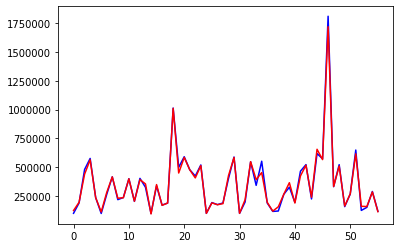

In [39]:
from sklearn import ensemble
reg = ensemble.GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100,
                                         subsample=1.0, criterion='friedman_mse', min_samples_split=2,
                                         min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                                         min_impurity_decrease=0.0, min_impurity_split=None, 
                                         init=None, random_state= 42, max_features=None, 
                                         alpha=0.9, verbose=0, max_leaf_nodes=None, 
                                         warm_start=False, validation_fraction=0.1, n_iter_no_change=None, 
                                         tol=0.0001)
# defining parameter range
param_grid = {'n_estimators' : [10, 20, 50, 100],
              
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15, None ],
              'loss' : ['ls', 'lad', 'huber', 'quantile'],
             }
'''param_grid = {'n_estimators' : [10, 20, 50, 100],
              'criterion': ['mse','friedman_mse', 'mae'],  
              'max_depth': [3,4,5,7,10,15 None ],
              'max_features' : ['auto', 'sqrt', 'log2', None],
              'max_leaf_nodes' : [None, 10, 20,50, 100], 
              'warm_start': ['True', 'False'],
              'loss' : ['ls', 'lad', 'huber', 'quantile'],
              'learning_rate' : [0.1, 0.5, 0.01, 0.001, 0.0001],
              'subsample': [0.2, 0.4, 0.6, 0.8, 1],
              'validation_fraction': [0.2, 0.1, 0.3, 0.4]
             } '''
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# 10 fold cross validation for best GBR

KFold(n_splits=10, random_state=42, shuffle=True)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
(252, 22) (28, 22) (252,) (28,)
MSE for 10 folds
 [124442428.63602114, 591112060.0459085, 1639346018.3308518, 4131459513.9331384, 3694711683.2499776, 149382569.03845632, 32557528608.092354, 1052069686.8040746, 961246064.5504676, 874453315.9766103]

R2 scores for 10 folds
 [0.9969069830296579, 0.9944725537161859, 0.9787760822336464, 0.9655440529842666, 0.9867858512620171, 0.998889186285297, 0.9362778704524126, 0.9866493484873912, 0.9947123972924832, 0.9889093944627596]

MAPE for 10 folds
 [0.029318978015238317, 0.05283980515816653, 0.051123540471403564, 0.04119035319618063, 0.05157188161478278, 0.024529045504646484, 0.060526781953317337, 0.057313292205512

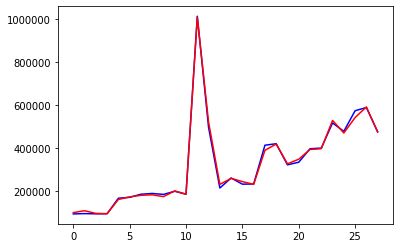

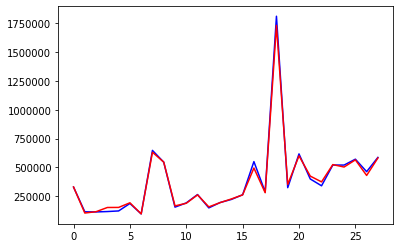

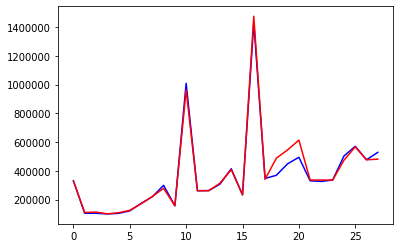

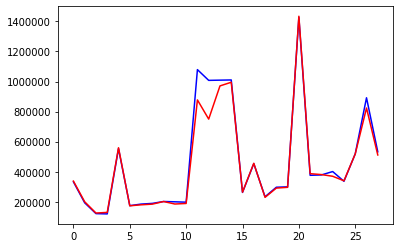

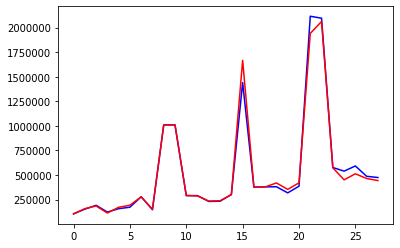

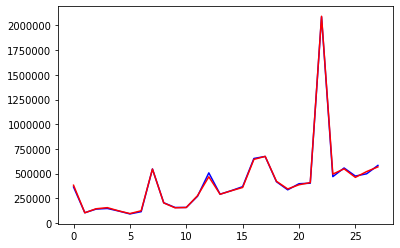

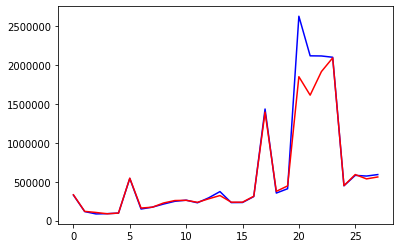

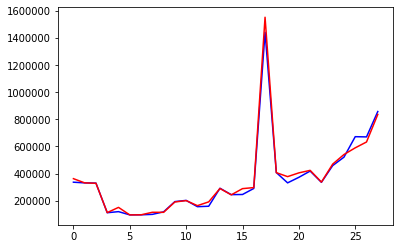

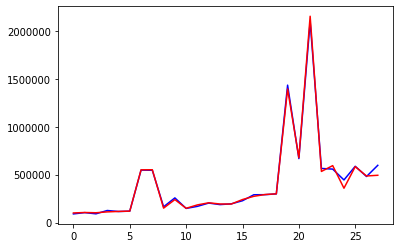

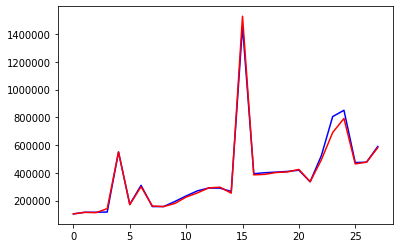

In [40]:
from sklearn import ensemble
reg_best = ensemble.GradientBoostingRegressor(alpha=0.9, criterion='mae', init=None,
                          learning_rate=0.1, loss='lad', max_depth=None,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    reg_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = reg_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))   

# 10. XGB Boost + Grid Search

C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[13:01:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=0.549, total=   0.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[13:01:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=0.352, total=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................
[13:01:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=10, score=0.486, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................
[13:01:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=20, score=0.832, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................
[13:01:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=3, n_estimators=20, score=0.656, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators

[CV]  learning_rate=0.1, max_depth=5, n_estimators=20, score=0.831, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................
[13:01:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=20, score=0.656, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................
[13:01:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimators=20, score=0.764, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=50 .................
[13:01:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=5, n_estimator

[13:01:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=20, score=0.763, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[13:01:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.941, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[13:01:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50, score=0.867, total=   0.0s
[CV] learning_rate=0.1, max_depth=10, n_estimators=50 ................
[13:01:22] WARNING: C:/Jenkins/workspace/xgboo

[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.900, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[13:01:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.976, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[13:01:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.995, total=   0.0s
[CV] learning_rate=0.5, max_depth=3, n_estimators=100 ................
[13:01:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=3, n_estimator

[13:01:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=50, score=0.996, total=   0.0s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[13:01:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.885, total=   0.1s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[13:01:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.983, total=   0.1s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[13:01:24] WARNING: C:/Jenkins/workspace/xgboos

[CV] learning_rate=0.5, max_depth=10, n_estimators=100 ...............
[13:01:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100, score=0.984, total=   0.1s
[CV] learning_rate=0.5, max_depth=10, n_estimators=100 ...............
[13:01:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100, score=0.995, total=   0.1s
[CV] learning_rate=0.5, max_depth=15, n_estimators=10 ................
[13:01:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.5, max_depth=15, n_estimators=10, score=0.859, total=   0.0s
[CV] learning_rate=0.5, max_depth=15, n_esti

[13:01:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=3, n_estimators=100, score=0.403, total=   0.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[13:01:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=4, n_estimators=10, score=-0.900, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[13:01:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=4, n_estimators=10, score=-0.595, total=   0.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................
[13:01:26] WARNING: C:/Jenkins/workspace/xg

[CV]  learning_rate=0.01, max_depth=7, n_estimators=10, score=-0.900, total=   0.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=10 ................
[13:01:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=7, n_estimators=10, score=-0.595, total=   0.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=10 ................
[13:01:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=7, n_estimators=10, score=-0.899, total=   0.0s
[CV] learning_rate=0.01, max_depth=7, n_estimators=20 ................
[13:01:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=7, n_es

[13:01:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=10, score=-0.899, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[13:01:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=20, score=-0.584, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[13:01:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.01, max_depth=15, n_estimators=20, score=-0.417, total=   0.0s
[CV] learning_rate=0.01, max_depth=15, n_estimators=20 ...............
[13:01:28] WARNING: C:/Jenkins/workspace

[CV]  learning_rate=0.001, max_depth=4, n_estimators=20, score=-1.200, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=20 ...............
[13:01:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=4, n_estimators=20, score=-0.760, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=20 ...............
[13:01:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=4, n_estimators=20, score=-1.186, total=   0.0s
[CV] learning_rate=0.001, max_depth=4, n_estimators=50 ...............
[13:01:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=4, 

[13:01:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=20, score=-1.186, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[13:01:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=50, score=-1.085, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[13:01:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=7, n_estimators=50, score=-0.698, total=   0.0s
[CV] learning_rate=0.001, max_depth=7, n_estimators=50 ...............
[13:01:30] WARNING: C:/Jenkins/workspace

[CV]  learning_rate=0.001, max_depth=15, n_estimators=50, score=-1.085, total=   0.0s
[CV] learning_rate=0.001, max_depth=15, n_estimators=50 ..............
[13:01:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=15, n_estimators=50, score=-0.698, total=   0.0s
[CV] learning_rate=0.001, max_depth=15, n_estimators=50 ..............
[13:01:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=15, n_estimators=50, score=-1.075, total=   0.0s
[CV] learning_rate=0.001, max_depth=15, n_estimators=100 .............
[13:01:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.001, max_depth=

[13:01:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=50, score=-1.245, total=   0.0s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[13:01:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=100, score=-1.243, total=   0.1s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[13:01:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=4, n_estimators=100, score=-0.783, total=   0.1s
[CV] learning_rate=0.0001, max_depth=4, n_estimators=100 .............
[13:01:32] WARNING: C:/Jenkins/work

[13:01:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=7, n_estimators=100, score=-1.243, total=   0.1s
[CV] learning_rate=0.0001, max_depth=7, n_estimators=100 .............
[13:01:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=7, n_estimators=100, score=-0.783, total=   0.1s
[CV] learning_rate=0.0001, max_depth=7, n_estimators=100 .............
[13:01:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=7, n_estimators=100, score=-1.226, total=   0.1s
[CV] learning_rate=0.0001, max_depth=10, n_estimators=10 .............
[13:01:33] WARNING: C:/Jenkins/wor

[13:01:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=15, n_estimators=100, score=-0.783, total=   0.1s
[CV] learning_rate=0.0001, max_depth=15, n_estimators=100 ............
[13:01:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  learning_rate=0.0001, max_depth=15, n_estimators=100, score=-1.226, total=   0.1s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   14.4s finished
C:\Users\Rajat\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[13:01:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 100}
XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, validate_parameters=False, verbosity=1)
MSE =  1521962077.0752738
R2 score = 0.9795557800097388

Mean Absolute Percentage Error = 0.05569481482062206
Mean Absolute Error is: 17602.571819687502


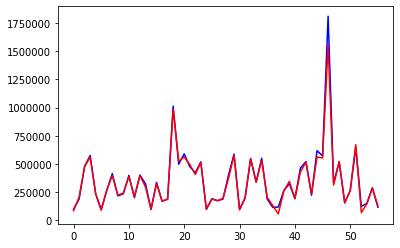

In [41]:
import xgboost as xgb
# data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)
reg = xgb.XGBRegressor(booster = 'gbtree',validate_parameters = False,  
                objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
# defining parameter range 
param_grid = {'n_estimators' : [10, 20, 50, 100], 
              'max_depth': [3,4,5,7,10,15],
              'learning_rate' : [0.1, 0.5, 0.01, 0.001, 0.0001]      
             } 
grid = GridSearchCV(reg, param_grid, refit = True, verbose = 3)

# fitting the model for grid search 
grid.fit(X_train, Y_train) 

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 
# clf = SVR(kernel = 'poly', degree= 15)
# clf.fit(X_train, Y_train)
Y_pred = grid.predict(X_test)
# Y_pred = reg.predict(X_test)
print('MSE = ', mean_squared_error(Y_test, Y_pred))
plt.plot(Y_test, 'b')
plt.plot(Y_pred, 'r')
# print('Accuracy =',accuracy_score(Y_test, Y_pred))
print('R2 score =',r2_score(Y_test, Y_pred))
print('\nMean Absolute Percentage Error =',absolute_percentage_error(Y_test, Y_pred))
print('Mean Absolute Error is:',mean_absolute_error(Y_test, Y_pred))

# # 10 fold cross validation for best XGB 

KFold(n_splits=10, random_state=42, shuffle=True)
(252, 22) (28, 22) (252,) (28,)
[13:01:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(252, 22) (28, 22) (252,) (28,)
[13:01:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(252, 22) (28, 22) (252,) (28,)
[13:01:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(252, 22) (28, 22) (252,) (28,)
[13:01:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
(252, 22) (28, 22) (252,) (28,)
[13:01:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated 

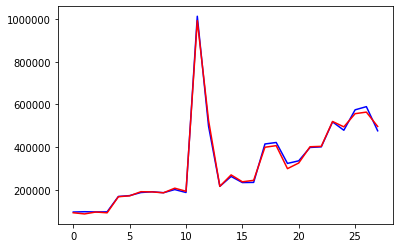

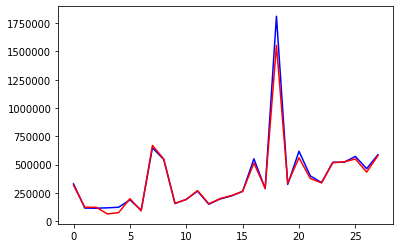

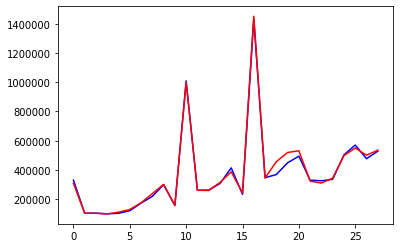

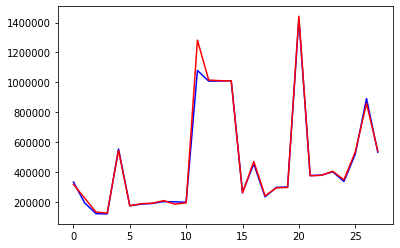

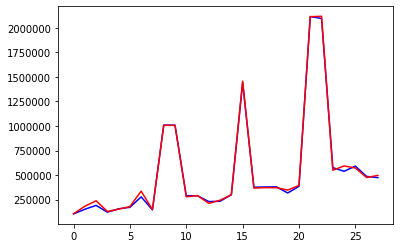

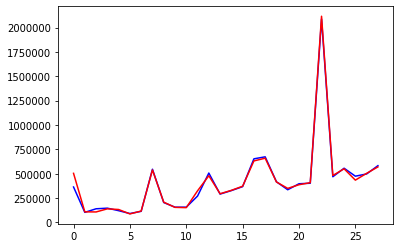

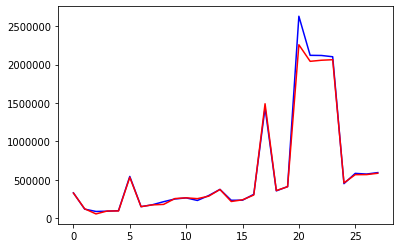

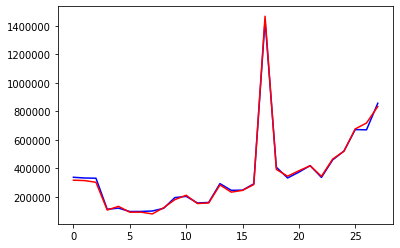

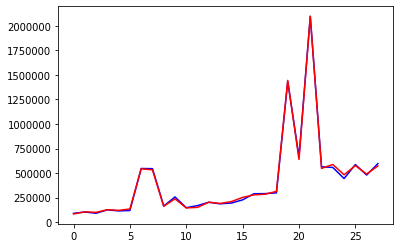

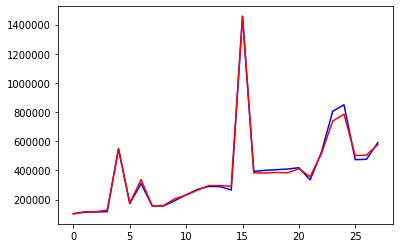

In [42]:
import xgboost as xgb
# data_dmatrix = xgb.DMatrix(data=X_train,label=Y_train)
reg_best = xgb.XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, validate_parameters=False, verbosity=1)
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
for train_index, test_index in cv.split(X):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)

    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    reg_best.fit(X_train_fold, Y_train_fold)
    Y_pred_fold = reg_best.predict(X_test_fold)
    # scores.append(best_svr.score(X_test, y_test))
    
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMAE scores for 10 folds\n', mae_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))    
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# 11. DNN_1

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               11776     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(252, 22) (28, 22) (252,) (28,)
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 0s - loss: 432197.5311 - mae: 432197.5312
Epoch 2/100
 - 0s - loss: 420489.9067 - mae: 420489.8750
Epoch 3/100
 - 0s - loss: 400275.3812 - mae: 400275.4688
Epoch 4/100
 - 0s - loss: 372927.4308 - mae: 372927.4688
Epoch 5/100
 - 0s - loss: 348633.6713 - mae: 348633.6562
Epoch 6/100
 - 0s - loss: 329850.

Epoch 24/100
 - 0s - loss: 190798.2111 - mae: 190798.2188
Epoch 25/100
 - 0s - loss: 190065.4769 - mae: 190065.5156
Epoch 26/100
 - 0s - loss: 189363.9278 - mae: 189363.9062
Epoch 27/100
 - 0s - loss: 188394.0601 - mae: 188394.0469
Epoch 28/100
 - 0s - loss: 187734.0287 - mae: 187734.0469
Epoch 29/100
 - 0s - loss: 186787.2109 - mae: 186787.2031
Epoch 30/100
 - 0s - loss: 186274.4322 - mae: 186274.4375
Epoch 31/100
 - 0s - loss: 185376.4270 - mae: 185376.4219
Epoch 32/100
 - 0s - loss: 185757.5484 - mae: 185757.5469
Epoch 33/100
 - 0s - loss: 185912.2484 - mae: 185912.2344
Epoch 34/100
 - 0s - loss: 184419.3440 - mae: 184419.3125
Epoch 35/100
 - 0s - loss: 183965.8425 - mae: 183965.8594
Epoch 36/100
 - 0s - loss: 184062.9753 - mae: 184063.0000
Epoch 37/100
 - 0s - loss: 183668.9458 - mae: 183668.9375
Epoch 38/100
 - 0s - loss: 183482.6363 - mae: 183482.6562
Epoch 39/100
 - 0s - loss: 182755.3472 - mae: 182755.3438
Epoch 40/100
 - 0s - loss: 182266.1428 - mae: 182266.1406
Epoch 41/100
 

Epoch 64/100
 - 0s - loss: 139250.8102 - mae: 139250.8125
Epoch 65/100
 - 0s - loss: 139006.7584 - mae: 139006.7656
Epoch 66/100
 - 0s - loss: 138792.7626 - mae: 138792.7656
Epoch 67/100
 - 0s - loss: 139197.6592 - mae: 139197.6875
Epoch 68/100
 - 0s - loss: 138017.4453 - mae: 138017.4531
Epoch 69/100
 - 0s - loss: 138354.8187 - mae: 138354.8125
Epoch 70/100
 - 0s - loss: 138265.6881 - mae: 138265.6875
Epoch 71/100
 - 0s - loss: 138956.1204 - mae: 138956.1250
Epoch 72/100
 - 0s - loss: 138368.1470 - mae: 138368.1562
Epoch 73/100
 - 0s - loss: 137451.7802 - mae: 137451.7969
Epoch 74/100
 - 0s - loss: 137044.0063 - mae: 137044.0156
Epoch 75/100
 - 0s - loss: 137007.1067 - mae: 137007.1094
Epoch 76/100
 - 0s - loss: 136463.7230 - mae: 136463.7344
Epoch 77/100
 - 0s - loss: 136134.1386 - mae: 136134.1250
Epoch 78/100
 - 0s - loss: 136025.3512 - mae: 136025.3281
Epoch 79/100
 - 0s - loss: 135675.8583 - mae: 135675.8594
Epoch 80/100
 - 0s - loss: 135680.0183 - mae: 135680.0312
Epoch 81/100
 

Epoch 3/100
 - 0s - loss: 116581.4889 - mae: 116581.4844
Epoch 4/100
 - 0s - loss: 116374.8334 - mae: 116374.8438
Epoch 5/100
 - 0s - loss: 116268.4878 - mae: 116268.4766
Epoch 6/100
 - 0s - loss: 117912.6367 - mae: 117912.6250
Epoch 7/100
 - 0s - loss: 115670.1213 - mae: 115670.1172
Epoch 8/100
 - 0s - loss: 116604.8543 - mae: 116604.8516
Epoch 9/100
 - 0s - loss: 116496.9461 - mae: 116496.9453
Epoch 10/100
 - 0s - loss: 116302.8551 - mae: 116302.8594
Epoch 11/100
 - 0s - loss: 116050.8774 - mae: 116050.8828
Epoch 12/100
 - 0s - loss: 115712.2945 - mae: 115712.2969
Epoch 13/100
 - 0s - loss: 115596.3349 - mae: 115596.3359
Epoch 14/100
 - 0s - loss: 116120.5729 - mae: 116120.5781
Epoch 15/100
 - 0s - loss: 117363.3344 - mae: 117363.3359
Epoch 16/100
 - 0s - loss: 115627.5850 - mae: 115627.5781
Epoch 17/100
 - 0s - loss: 115486.3964 - mae: 115486.3984
Epoch 18/100
 - 0s - loss: 115094.0399 - mae: 115094.0391
Epoch 19/100
 - 0s - loss: 115504.2275 - mae: 115504.2188
Epoch 20/100
 - 0s - 

Epoch 43/100
 - 0s - loss: 105475.3684 - mae: 105475.3750
Epoch 44/100
 - 0s - loss: 106109.8469 - mae: 106109.8672
Epoch 45/100
 - 0s - loss: 105096.3505 - mae: 105096.3516
Epoch 46/100
 - 0s - loss: 105836.5129 - mae: 105836.5156
Epoch 47/100
 - 0s - loss: 104991.6243 - mae: 104991.6250
Epoch 48/100
 - 0s - loss: 104587.1380 - mae: 104587.1406
Epoch 49/100
 - 0s - loss: 105943.5045 - mae: 105943.4922
Epoch 50/100
 - 0s - loss: 104520.1371 - mae: 104520.1328
Epoch 51/100
 - 0s - loss: 105119.8414 - mae: 105119.8438
Epoch 52/100
 - 0s - loss: 104283.9953 - mae: 104283.9922
Epoch 53/100
 - 0s - loss: 104074.4112 - mae: 104074.4141
Epoch 54/100
 - 0s - loss: 104717.4673 - mae: 104717.4766
Epoch 55/100
 - 0s - loss: 104137.3104 - mae: 104137.3203
Epoch 56/100
 - 0s - loss: 105644.6007 - mae: 105644.6094
Epoch 57/100
 - 0s - loss: 104313.0042 - mae: 104312.9844
Epoch 58/100
 - 0s - loss: 104063.1514 - mae: 104063.1406
Epoch 59/100
 - 0s - loss: 104292.3968 - mae: 104292.3906
Epoch 60/100
 

Epoch 86/100
 - 0s - loss: 84698.3714 - mae: 84698.3750
Epoch 87/100
 - 0s - loss: 84057.6721 - mae: 84057.6641
Epoch 88/100
 - 0s - loss: 84866.9640 - mae: 84866.9609
Epoch 89/100
 - 0s - loss: 85313.2595 - mae: 85313.2578
Epoch 90/100
 - 0s - loss: 85721.7817 - mae: 85721.7656
Epoch 91/100
 - 0s - loss: 85587.2917 - mae: 85587.2969
Epoch 92/100
 - 0s - loss: 84026.6832 - mae: 84026.6719
Epoch 93/100
 - 0s - loss: 84157.0910 - mae: 84157.0938
Epoch 94/100
 - 0s - loss: 83655.0385 - mae: 83655.0391
Epoch 95/100
 - 0s - loss: 85043.3328 - mae: 85043.3359
Epoch 96/100
 - 0s - loss: 83755.5815 - mae: 83755.5781
Epoch 97/100
 - 0s - loss: 83627.2904 - mae: 83627.2969
Epoch 98/100
 - 0s - loss: 83378.6283 - mae: 83378.6250
Epoch 99/100
 - 0s - loss: 84187.1423 - mae: 84187.1406
Epoch 100/100
 - 0s - loss: 85103.4553 - mae: 85103.4609
*******************Fold number************************:  8
(252, 22) (28, 22) (252,) (28,)
Epoch 1/100
 - 0s - loss: 94562.8099 - mae: 94562.8125
Epoch 2/100
 

Epoch 30/100
 - 0s - loss: 87359.3208 - mae: 87359.3359
Epoch 31/100
 - 0s - loss: 87266.9205 - mae: 87266.9141
Epoch 32/100
 - 0s - loss: 87492.1047 - mae: 87492.1016
Epoch 33/100
 - 0s - loss: 85972.6335 - mae: 85972.6328
Epoch 34/100
 - 0s - loss: 91036.5047 - mae: 91036.5078
Epoch 35/100
 - 0s - loss: 87846.6643 - mae: 87846.6562
Epoch 36/100
 - 0s - loss: 87313.5747 - mae: 87313.5781
Epoch 37/100
 - 0s - loss: 89709.1895 - mae: 89709.1797
Epoch 38/100
 - 0s - loss: 88757.7043 - mae: 88757.7109
Epoch 39/100
 - 0s - loss: 89556.5299 - mae: 89556.5312
Epoch 40/100
 - 0s - loss: 87582.2468 - mae: 87582.2422
Epoch 41/100
 - 0s - loss: 86391.9247 - mae: 86391.9219
Epoch 42/100
 - 0s - loss: 86844.5505 - mae: 86844.5469
Epoch 43/100
 - 0s - loss: 86951.5149 - mae: 86951.5000
Epoch 44/100
 - 0s - loss: 85690.6596 - mae: 85690.6641
Epoch 45/100
 - 0s - loss: 86197.2918 - mae: 86197.2969
Epoch 46/100
 - 0s - loss: 86372.6692 - mae: 86372.6797
Epoch 47/100
 - 0s - loss: 85527.7895 - mae: 855

Epoch 75/100
 - 0s - loss: 83911.5659 - mae: 83911.5703
Epoch 76/100
 - 0s - loss: 84271.4806 - mae: 84271.4688
Epoch 77/100
 - 0s - loss: 83883.4507 - mae: 83883.4531
Epoch 78/100
 - 0s - loss: 83406.5325 - mae: 83406.5312
Epoch 79/100
 - 0s - loss: 83015.5817 - mae: 83015.5703
Epoch 80/100
 - 0s - loss: 83973.8406 - mae: 83973.8359
Epoch 81/100
 - 0s - loss: 84262.4005 - mae: 84262.3984
Epoch 82/100
 - 0s - loss: 84396.9309 - mae: 84396.9219
Epoch 83/100
 - 0s - loss: 83603.5199 - mae: 83603.5312
Epoch 84/100
 - 0s - loss: 84103.4687 - mae: 84103.4844
Epoch 85/100
 - 0s - loss: 84656.6926 - mae: 84656.6875
Epoch 86/100
 - 0s - loss: 83585.6409 - mae: 83585.6484
Epoch 87/100
 - 0s - loss: 83745.7742 - mae: 83745.7812
Epoch 88/100
 - 0s - loss: 82966.6497 - mae: 82966.6484
Epoch 89/100
 - 0s - loss: 82941.5148 - mae: 82941.5234
Epoch 90/100
 - 0s - loss: 85007.8230 - mae: 85007.8359
Epoch 91/100
 - 0s - loss: 83253.3432 - mae: 83253.3438
Epoch 92/100
 - 0s - loss: 82573.6615 - mae: 825

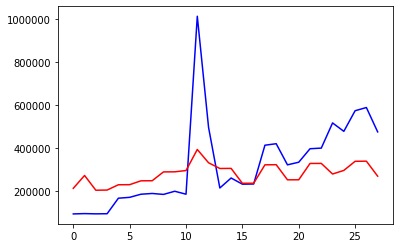

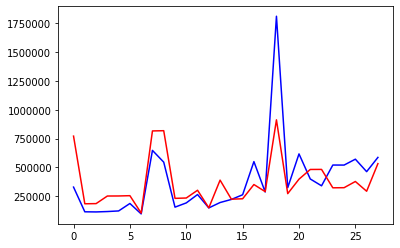

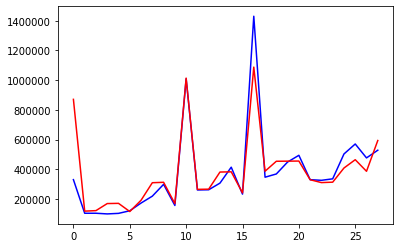

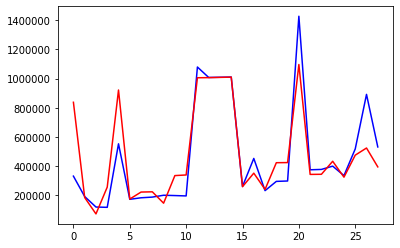

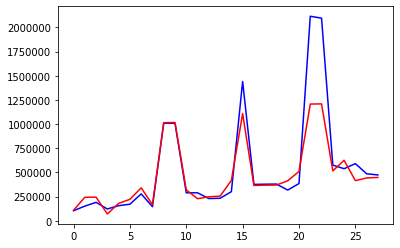

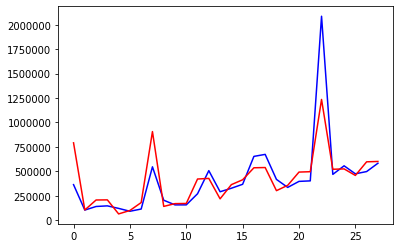

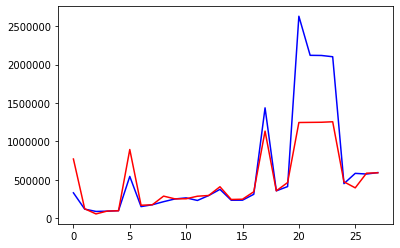

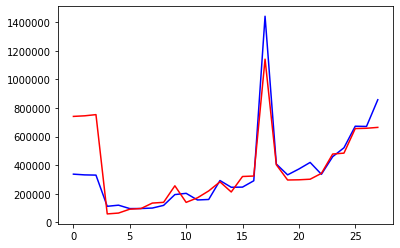

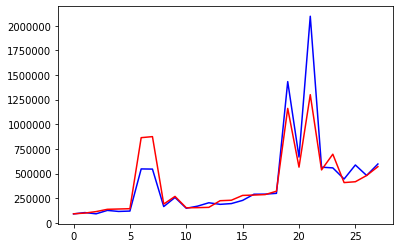

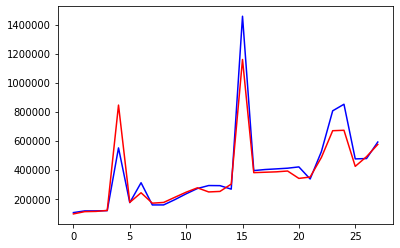

In [44]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=22, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in cv.split(X):
    print('*******************Fold number************************: ',k)
    k = k+1    
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    # print('Accuracy =',accuracy_score(Y_test, Y_pred))
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))   
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# DNN_2

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               11776     
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 513       
Total params: 537,601
Trainable params: 537,601
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(252, 22) (28, 22) (252,) (28,)
Epoch 1/100
 - 2s - loss: 374064.3786 - mae: 374064.3750
Epoch 2/100
 - 1s - loss: 300276.4045 - mae

Epoch 26/100
 - 1s - loss: 54124.9868 - mae: 54124.9883
Epoch 27/100
 - 1s - loss: 47984.4149 - mae: 47984.4141
Epoch 28/100
 - 1s - loss: 43962.7542 - mae: 43962.7500
Epoch 29/100
 - 1s - loss: 38631.1916 - mae: 38631.1914
Epoch 30/100
 - 1s - loss: 39216.6315 - mae: 39216.6367
Epoch 31/100
 - 1s - loss: 37830.5606 - mae: 37830.5547
Epoch 32/100
 - 1s - loss: 42371.5907 - mae: 42371.5938
Epoch 33/100
 - 1s - loss: 40915.9370 - mae: 40915.9375
Epoch 34/100
 - 1s - loss: 43627.5953 - mae: 43627.5977
Epoch 35/100
 - 1s - loss: 37848.4066 - mae: 37848.4023
Epoch 36/100
 - 1s - loss: 35904.2530 - mae: 35904.2539
Epoch 37/100
 - 1s - loss: 42615.8677 - mae: 42615.8633
Epoch 38/100
 - 1s - loss: 38205.7251 - mae: 38205.7188
Epoch 39/100
 - 1s - loss: 44817.6886 - mae: 44817.6914
Epoch 40/100
 - 1s - loss: 39942.1292 - mae: 39942.1289
Epoch 41/100
 - 1s - loss: 35610.7888 - mae: 35610.7930
Epoch 42/100
 - 1s - loss: 36153.0825 - mae: 36153.0820
Epoch 43/100
 - 1s - loss: 44876.4490 - mae: 448

Epoch 71/100
 - 1s - loss: 41260.0594 - mae: 41260.0586
Epoch 72/100
 - 1s - loss: 47060.8067 - mae: 47060.8047
Epoch 73/100
 - 1s - loss: 44753.6105 - mae: 44753.6055
Epoch 74/100
 - 1s - loss: 48535.8631 - mae: 48535.8555
Epoch 75/100
 - 1s - loss: 50000.9275 - mae: 50000.9336
Epoch 76/100
 - 1s - loss: 38714.9040 - mae: 38714.9023
Epoch 77/100
 - 1s - loss: 43128.3538 - mae: 43128.3516
Epoch 78/100
 - 1s - loss: 37071.2571 - mae: 37071.2539
Epoch 79/100
 - 1s - loss: 35212.7770 - mae: 35212.7773
Epoch 80/100
 - 1s - loss: 40799.0045 - mae: 40799.0039
Epoch 81/100
 - 1s - loss: 34728.8743 - mae: 34728.8711
Epoch 82/100
 - 1s - loss: 38447.7123 - mae: 38447.7109
Epoch 83/100
 - 1s - loss: 34029.0947 - mae: 34029.0938
Epoch 84/100
 - 1s - loss: 47924.9536 - mae: 47924.9531
Epoch 85/100
 - 1s - loss: 38750.7271 - mae: 38750.7227
Epoch 86/100
 - 1s - loss: 34340.7935 - mae: 34340.7930
Epoch 87/100
 - 1s - loss: 35755.8900 - mae: 35755.8906
Epoch 88/100
 - 1s - loss: 37313.4914 - mae: 373

Epoch 15/100
 - 1s - loss: 38096.5451 - mae: 38096.5430
Epoch 16/100
 - 1s - loss: 36142.9815 - mae: 36142.9805
Epoch 17/100
 - 1s - loss: 30894.2947 - mae: 30894.2910
Epoch 18/100
 - 1s - loss: 33359.3387 - mae: 33359.3398
Epoch 19/100
 - 1s - loss: 32578.7424 - mae: 32578.7402
Epoch 20/100
 - 1s - loss: 32949.6716 - mae: 32949.6719
Epoch 21/100
 - 1s - loss: 32468.3013 - mae: 32468.2988
Epoch 22/100
 - 1s - loss: 39080.5246 - mae: 39080.5273
Epoch 23/100
 - 1s - loss: 39066.2652 - mae: 39066.2656
Epoch 24/100
 - 1s - loss: 32448.1952 - mae: 32448.1934
Epoch 25/100
 - 1s - loss: 38947.0460 - mae: 38947.0469
Epoch 26/100
 - 1s - loss: 36620.9515 - mae: 36620.9531
Epoch 27/100
 - 1s - loss: 35129.7641 - mae: 35129.7656
Epoch 28/100
 - 1s - loss: 30133.6301 - mae: 30133.6289
Epoch 29/100
 - 1s - loss: 36171.7408 - mae: 36171.7461
Epoch 30/100
 - 1s - loss: 34363.1937 - mae: 34363.1953
Epoch 31/100
 - 1s - loss: 31619.2652 - mae: 31619.2676
Epoch 32/100
 - 1s - loss: 32344.0690 - mae: 323

Epoch 60/100
 - 1s - loss: 27518.1269 - mae: 27518.1270
Epoch 61/100
 - 1s - loss: 30962.7152 - mae: 30962.7148
Epoch 62/100
 - 1s - loss: 31104.2233 - mae: 31104.2246
Epoch 63/100
 - 1s - loss: 33197.0908 - mae: 33197.0898
Epoch 64/100
 - 1s - loss: 30300.4135 - mae: 30300.4141
Epoch 65/100
 - 1s - loss: 29970.1205 - mae: 29970.1211
Epoch 66/100
 - 1s - loss: 36030.5058 - mae: 36030.5078
Epoch 67/100
 - 1s - loss: 30436.6789 - mae: 30436.6797
Epoch 68/100
 - 1s - loss: 30401.3809 - mae: 30401.3809
Epoch 69/100
 - 1s - loss: 28458.4357 - mae: 28458.4395
Epoch 70/100
 - 1s - loss: 30932.9586 - mae: 30932.9590
Epoch 71/100
 - 1s - loss: 26834.0151 - mae: 26834.0156
Epoch 72/100
 - 1s - loss: 29953.2854 - mae: 29953.2852
Epoch 73/100
 - 1s - loss: 27517.3705 - mae: 27517.3691
Epoch 74/100
 - 1s - loss: 31168.7216 - mae: 31168.7188
Epoch 75/100
 - 1s - loss: 30656.6911 - mae: 30656.6914
Epoch 76/100
 - 1s - loss: 35076.8078 - mae: 35076.8047
Epoch 77/100
 - 1s - loss: 32128.3494 - mae: 321

 - 1s - loss: 26846.2233 - mae: 26846.2207
Epoch 4/100
 - 1s - loss: 46285.5878 - mae: 46285.5938
Epoch 5/100
 - 1s - loss: 29753.7458 - mae: 29753.7461
Epoch 6/100
 - 1s - loss: 32565.2495 - mae: 32565.2480
Epoch 7/100
 - 1s - loss: 31852.2692 - mae: 31852.2656
Epoch 8/100
 - 1s - loss: 36806.7655 - mae: 36806.7656
Epoch 9/100
 - 1s - loss: 38986.4170 - mae: 38986.4141
Epoch 10/100
 - 1s - loss: 30219.1965 - mae: 30219.1934
Epoch 11/100
 - 1s - loss: 36835.2170 - mae: 36835.2188
Epoch 12/100
 - 1s - loss: 29263.6223 - mae: 29263.6230
Epoch 13/100
 - 1s - loss: 31857.7006 - mae: 31857.7031
Epoch 14/100
 - 1s - loss: 31219.6439 - mae: 31219.6426
Epoch 15/100
 - 1s - loss: 31216.4910 - mae: 31216.4902
Epoch 16/100
 - 1s - loss: 31063.4955 - mae: 31063.4922
Epoch 17/100
 - 1s - loss: 28910.8377 - mae: 28910.8379
Epoch 18/100
 - 1s - loss: 28839.8808 - mae: 28839.8789
Epoch 19/100
 - 1s - loss: 31854.7613 - mae: 31854.7617
Epoch 20/100
 - 1s - loss: 27319.8910 - mae: 27319.8867
Epoch 21/10

Epoch 48/100
 - 1s - loss: 36708.4715 - mae: 36708.4727
Epoch 49/100
 - 1s - loss: 36352.2598 - mae: 36352.2578
Epoch 50/100
 - 1s - loss: 40661.9656 - mae: 40661.9648
Epoch 51/100
 - 1s - loss: 43401.9100 - mae: 43401.9141
Epoch 52/100
 - 1s - loss: 32382.0120 - mae: 32382.0137
Epoch 53/100
 - 1s - loss: 40979.8050 - mae: 40979.8047
Epoch 54/100
 - 1s - loss: 28368.3393 - mae: 28368.3398
Epoch 55/100
 - 1s - loss: 31628.0724 - mae: 31628.0723
Epoch 56/100
 - 1s - loss: 31859.2231 - mae: 31859.2227
Epoch 57/100
 - 1s - loss: 30689.2093 - mae: 30689.2090
Epoch 58/100
 - 1s - loss: 31082.8242 - mae: 31082.8281
Epoch 59/100
 - 1s - loss: 30074.8851 - mae: 30074.8867
Epoch 60/100
 - 1s - loss: 33074.9891 - mae: 33074.9883
Epoch 61/100
 - 1s - loss: 26878.9662 - mae: 26878.9668
Epoch 62/100
 - 1s - loss: 34735.4906 - mae: 34735.4922
Epoch 63/100
 - 1s - loss: 33771.8052 - mae: 33771.8008
Epoch 64/100
 - 1s - loss: 30412.1471 - mae: 30412.1484
Epoch 65/100
 - 1s - loss: 29518.7842 - mae: 295

Epoch 93/100
 - 1s - loss: 28005.2595 - mae: 28005.2637
Epoch 94/100
 - 1s - loss: 33689.8064 - mae: 33689.8008
Epoch 95/100
 - 1s - loss: 31367.3141 - mae: 31367.3105
Epoch 96/100
 - 1s - loss: 29655.6907 - mae: 29655.6934
Epoch 97/100
 - 1s - loss: 29303.2711 - mae: 29303.2715
Epoch 98/100
 - 1s - loss: 29140.7730 - mae: 29140.7734
Epoch 99/100
 - 1s - loss: 36681.8849 - mae: 36681.8828
Epoch 100/100
 - 1s - loss: 28391.6432 - mae: 28391.6445
MSE for 10 folds
 [2067103647.1121614, 9841264488.148134, 1090415726.0405588, 3374246905.311137, 941459006.8937484, 2690148073.0922046, 10962151764.918318, 1533992304.768745, 1694303917.280623, 888864032.9188404]

R2 scores for 10 folds
 [0.9486221320971278, 0.9079750448352873, 0.9858828499646541, 0.9718591281857386, 0.9966328687014451, 0.9799959701228359, 0.9785446965802308, 0.9805338021417539, 0.990680007637213, 0.9887266247548803]

MAPE for 10 folds
 [array([0.07473107], dtype=float32), array([0.14860359], dtype=float32), array([0.07913767], 

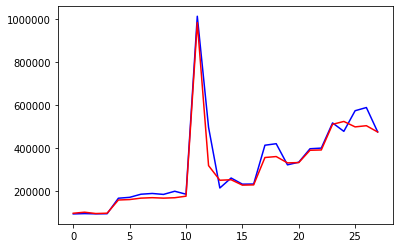

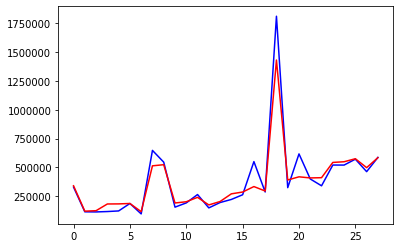

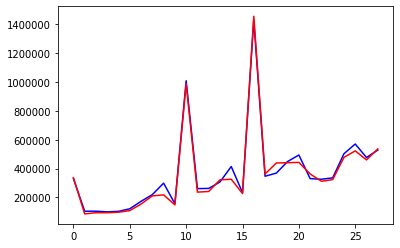

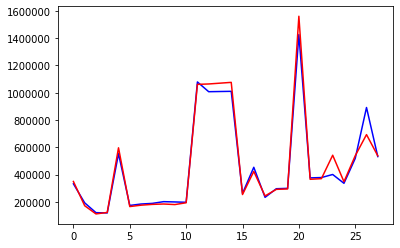

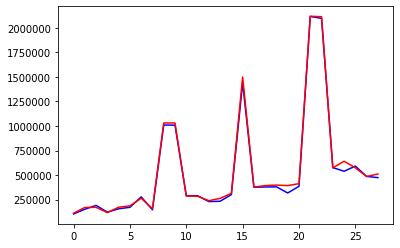

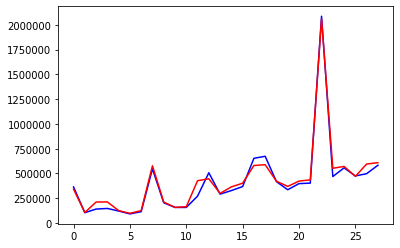

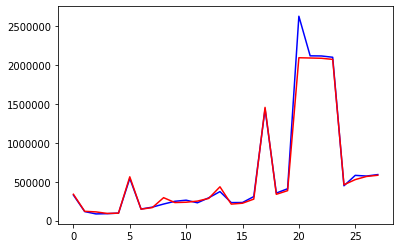

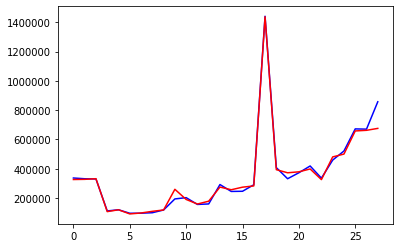

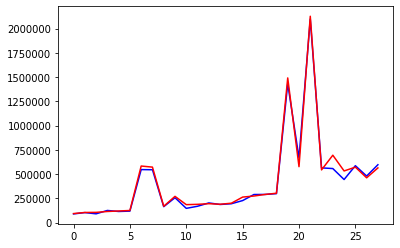

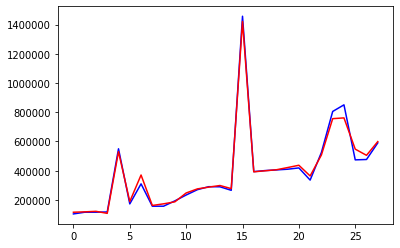

In [46]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=22, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1 
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1    
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
    
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores))   
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores))    

# DNN_3

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               5888      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_7 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 23,449
Trainable params: 23,449
Non-trainable params: 0
_________________________________________________________________
None
KFold(n_splits=10, random_state=42, shuffle=True)
*******************Fold number************************:  1
(2

Epoch 21/100
 - 0s - loss: 97417.6134 - mae: 97417.6250
Epoch 22/100
 - 0s - loss: 108270.3987 - mae: 108270.3984
Epoch 23/100
 - 0s - loss: 96546.0184 - mae: 96546.0234
Epoch 24/100
 - 0s - loss: 97011.0883 - mae: 97011.0859
Epoch 25/100
 - 0s - loss: 93883.6105 - mae: 93883.5938
Epoch 26/100
 - 0s - loss: 97624.0300 - mae: 97624.0234
Epoch 27/100
 - 0s - loss: 94345.4874 - mae: 94345.4922
Epoch 28/100
 - 0s - loss: 95178.8113 - mae: 95178.8047
Epoch 29/100
 - 0s - loss: 95724.1856 - mae: 95724.1875
Epoch 30/100
 - 0s - loss: 91320.7616 - mae: 91320.7734
Epoch 31/100
 - 0s - loss: 93424.9422 - mae: 93424.9453
Epoch 32/100
 - 0s - loss: 91053.3565 - mae: 91053.3438
Epoch 33/100
 - 0s - loss: 90317.7076 - mae: 90317.7031
Epoch 34/100
 - 0s - loss: 89761.2968 - mae: 89761.2969
Epoch 35/100
 - 0s - loss: 90831.0305 - mae: 90831.0156
Epoch 36/100
 - 0s - loss: 87473.6269 - mae: 87473.6172
Epoch 37/100
 - 0s - loss: 88289.4927 - mae: 88289.4922
Epoch 38/100
 - 0s - loss: 91707.2764 - mae: 9

Epoch 66/100
 - 0s - loss: 42913.9004 - mae: 42913.9023
Epoch 67/100
 - 0s - loss: 33274.7290 - mae: 33274.7266
Epoch 68/100
 - 0s - loss: 29940.2726 - mae: 29940.2754
Epoch 69/100
 - 0s - loss: 31339.8265 - mae: 31339.8242
Epoch 70/100
 - 0s - loss: 31700.2933 - mae: 31700.2930
Epoch 71/100
 - 0s - loss: 31647.9412 - mae: 31647.9414
Epoch 72/100
 - 0s - loss: 35927.1124 - mae: 35927.1133
Epoch 73/100
 - 0s - loss: 32380.8483 - mae: 32380.8477
Epoch 74/100
 - 0s - loss: 32369.2773 - mae: 32369.2773
Epoch 75/100
 - 0s - loss: 33960.3880 - mae: 33960.3867
Epoch 76/100
 - 0s - loss: 31923.4293 - mae: 31923.4297
Epoch 77/100
 - 0s - loss: 31704.0974 - mae: 31704.0977
Epoch 78/100
 - 0s - loss: 36352.5334 - mae: 36352.5352
Epoch 79/100
 - 0s - loss: 32393.6036 - mae: 32393.6055
Epoch 80/100
 - 0s - loss: 31524.5619 - mae: 31524.5645
Epoch 81/100
 - 0s - loss: 35783.2280 - mae: 35783.2266
Epoch 82/100
 - 0s - loss: 33498.6653 - mae: 33498.6680
Epoch 83/100
 - 0s - loss: 36769.0640 - mae: 367

Epoch 10/100
 - 0s - loss: 29033.0089 - mae: 29033.0098
Epoch 11/100
 - 0s - loss: 29869.0992 - mae: 29869.0996
Epoch 12/100
 - 0s - loss: 32589.9997 - mae: 32589.9980
Epoch 13/100
 - 0s - loss: 31903.0660 - mae: 31903.0664
Epoch 14/100
 - 0s - loss: 36227.2835 - mae: 36227.2812
Epoch 15/100
 - 0s - loss: 30064.5439 - mae: 30064.5430
Epoch 16/100
 - 0s - loss: 32009.6520 - mae: 32009.6504
Epoch 17/100
 - 0s - loss: 31383.7717 - mae: 31383.7715
Epoch 18/100
 - 0s - loss: 29964.3076 - mae: 29964.3047
Epoch 19/100
 - 0s - loss: 36469.8079 - mae: 36469.8086
Epoch 20/100
 - 0s - loss: 33778.7098 - mae: 33778.7070
Epoch 21/100
 - 0s - loss: 31616.6562 - mae: 31616.6543
Epoch 22/100
 - 0s - loss: 38250.5874 - mae: 38250.5898
Epoch 23/100
 - 0s - loss: 43263.6682 - mae: 43263.6797
Epoch 24/100
 - 0s - loss: 45583.0550 - mae: 45583.0586
Epoch 25/100
 - 0s - loss: 34429.3711 - mae: 34429.3789
Epoch 26/100
 - 0s - loss: 27728.5852 - mae: 27728.5879
Epoch 27/100
 - 0s - loss: 33796.8254 - mae: 337

Epoch 55/100
 - 0s - loss: 32369.3732 - mae: 32369.3730
Epoch 56/100
 - 0s - loss: 29172.2020 - mae: 29172.2012
Epoch 57/100
 - 0s - loss: 31776.1964 - mae: 31776.1973
Epoch 58/100
 - 0s - loss: 29402.0005 - mae: 29402.0020
Epoch 59/100
 - 0s - loss: 26919.4594 - mae: 26919.4570
Epoch 60/100
 - 0s - loss: 29471.4025 - mae: 29471.4043
Epoch 61/100
 - 0s - loss: 26269.1729 - mae: 26269.1699
Epoch 62/100
 - 0s - loss: 30180.6994 - mae: 30180.6992
Epoch 63/100
 - 0s - loss: 32063.2232 - mae: 32063.2246
Epoch 64/100
 - 0s - loss: 30029.1284 - mae: 30029.1309
Epoch 65/100
 - 0s - loss: 40265.1174 - mae: 40265.1172
Epoch 66/100
 - 0s - loss: 28677.0825 - mae: 28677.0820
Epoch 67/100
 - 0s - loss: 26576.0531 - mae: 26576.0547
Epoch 68/100
 - 0s - loss: 30673.0116 - mae: 30673.0137
Epoch 69/100
 - 0s - loss: 34240.8992 - mae: 34240.8984
Epoch 70/100
 - 0s - loss: 31922.7810 - mae: 31922.7852
Epoch 71/100
 - 0s - loss: 28335.1062 - mae: 28335.1055
Epoch 72/100
 - 0s - loss: 33660.7331 - mae: 336

Epoch 100/100
 - 0s - loss: 29860.9290 - mae: 29860.9277
*******************Fold number************************:  8
(252, 22) (28, 22) (252,) (28,)
Epoch 1/100
 - 0s - loss: 31282.1298 - mae: 31282.1270
Epoch 2/100
 - 0s - loss: 27796.8171 - mae: 27796.8184
Epoch 3/100
 - 0s - loss: 30812.1048 - mae: 30812.1055
Epoch 4/100
 - 0s - loss: 29107.2347 - mae: 29107.2363
Epoch 5/100
 - 0s - loss: 25909.7260 - mae: 25909.7266
Epoch 6/100
 - 0s - loss: 28022.0642 - mae: 28022.0664
Epoch 7/100
 - 0s - loss: 27238.4145 - mae: 27238.4141
Epoch 8/100
 - 0s - loss: 25930.8424 - mae: 25930.8457
Epoch 9/100
 - 0s - loss: 27317.1122 - mae: 27317.1094
Epoch 10/100
 - 0s - loss: 26554.2351 - mae: 26554.2363
Epoch 11/100
 - 0s - loss: 28653.1198 - mae: 28653.1211
Epoch 12/100
 - 0s - loss: 26838.6465 - mae: 26838.6465
Epoch 13/100
 - 0s - loss: 31206.4075 - mae: 31206.4043
Epoch 14/100
 - 0s - loss: 28400.8848 - mae: 28400.8809
Epoch 15/100
 - 0s - loss: 29554.0041 - mae: 29554.0039
Epoch 16/100
 - 0s - 

Epoch 44/100
 - 0s - loss: 25920.2216 - mae: 25920.2227
Epoch 45/100
 - 0s - loss: 30413.0853 - mae: 30413.0859
Epoch 46/100
 - 0s - loss: 28190.9159 - mae: 28190.9141
Epoch 47/100
 - 0s - loss: 26414.1377 - mae: 26414.1367
Epoch 48/100
 - 0s - loss: 24906.1943 - mae: 24906.1934
Epoch 49/100
 - 0s - loss: 26692.8525 - mae: 26692.8555
Epoch 50/100
 - 0s - loss: 31078.1333 - mae: 31078.1328
Epoch 51/100
 - 0s - loss: 26244.6988 - mae: 26244.6992
Epoch 52/100
 - 0s - loss: 31176.2013 - mae: 31176.2070
Epoch 53/100
 - 0s - loss: 28885.6474 - mae: 28885.6504
Epoch 54/100
 - 0s - loss: 27659.3200 - mae: 27659.3184
Epoch 55/100
 - 0s - loss: 26575.3056 - mae: 26575.3047
Epoch 56/100
 - 0s - loss: 31326.0903 - mae: 31326.0898
Epoch 57/100
 - 0s - loss: 27159.9213 - mae: 27159.9199
Epoch 58/100
 - 0s - loss: 28127.8128 - mae: 28127.8203
Epoch 59/100
 - 0s - loss: 27430.1644 - mae: 27430.1602
Epoch 60/100
 - 0s - loss: 27588.6769 - mae: 27588.6738
Epoch 61/100
 - 0s - loss: 29044.7469 - mae: 290

Epoch 89/100
 - 0s - loss: 35230.0920 - mae: 35230.0938
Epoch 90/100
 - 0s - loss: 26596.3162 - mae: 26596.3184
Epoch 91/100
 - 0s - loss: 24953.7402 - mae: 24953.7402
Epoch 92/100
 - 0s - loss: 29451.7141 - mae: 29451.7148
Epoch 93/100
 - 0s - loss: 33409.4804 - mae: 33409.4766
Epoch 94/100
 - 0s - loss: 27579.6368 - mae: 27579.6406
Epoch 95/100
 - 0s - loss: 27707.9296 - mae: 27707.9297
Epoch 96/100
 - 0s - loss: 25858.9358 - mae: 25858.9355
Epoch 97/100
 - 0s - loss: 28476.3749 - mae: 28476.3730
Epoch 98/100
 - 0s - loss: 25961.9907 - mae: 25961.9883
Epoch 99/100
 - 0s - loss: 29656.4018 - mae: 29656.4004
Epoch 100/100
 - 0s - loss: 26675.1028 - mae: 26675.1016
MSE for 10 folds
 [6011089340.76484, 9147530786.207655, 1794679565.8426595, 3190759302.4682736, 3336960511.641933, 1861154681.741645, 13658158837.4747, 3164150705.3180313, 1545167063.2269883, 2520110116.997739]

R2 scores for 10 folds
 [0.8505943547951073, 0.9144620986985593, 0.976765044660198, 0.9733893959035455, 0.988065349

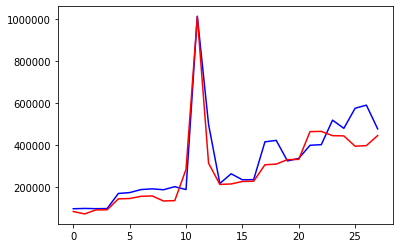

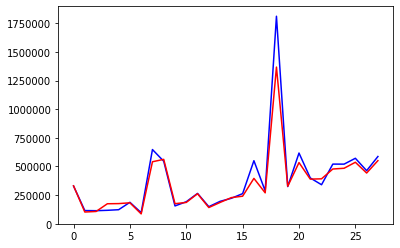

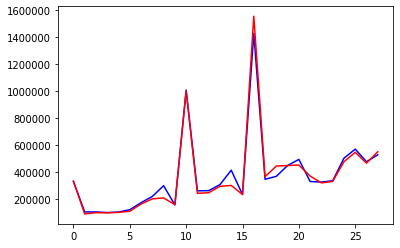

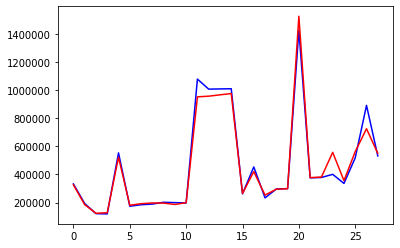

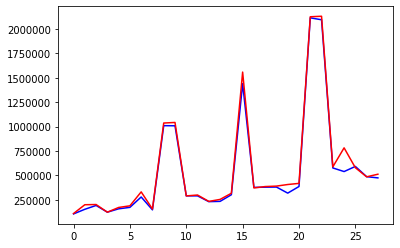

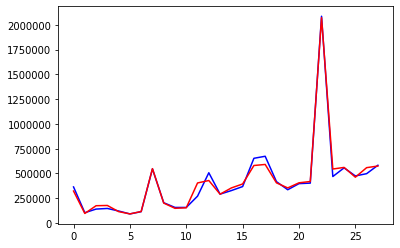

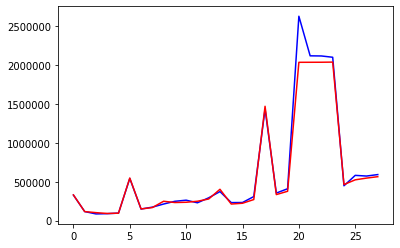

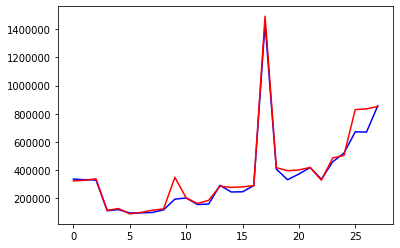

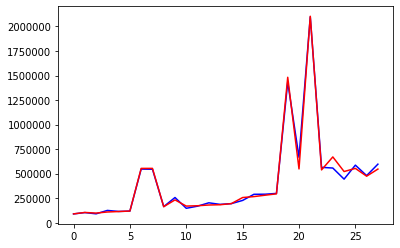

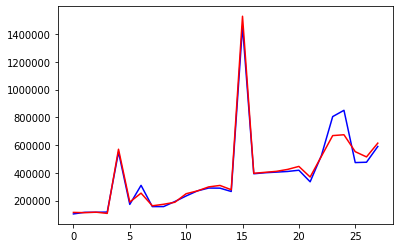

In [45]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(256, input_dim=22, activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(16,  activation='relu'))
model.add(Dense(4,  activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores)) 
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores)) 

# DNN_4

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               11776     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_16 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 18        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 3         
Total params: 81,853
Trainable params: 81,853
Non-trainable params: 0
__________________________________________________

Epoch 19/100
 - 0s - loss: 430316.1569 - mae: 430316.2188
Epoch 20/100
 - 0s - loss: 430316.1286 - mae: 430316.0938
Epoch 21/100
 - 0s - loss: 430316.1101 - mae: 430316.0625
Epoch 22/100
 - 0s - loss: 430316.0745 - mae: 430316.0312
Epoch 23/100
 - 0s - loss: 430316.0538 - mae: 430316.0938
Epoch 24/100
 - 0s - loss: 430316.0197 - mae: 430316.0000
Epoch 25/100
 - 0s - loss: 430315.9968 - mae: 430315.9688
Epoch 26/100
 - 0s - loss: 430315.9764 - mae: 430315.9062
Epoch 27/100
 - 0s - loss: 430315.9412 - mae: 430315.9688
Epoch 28/100
 - 0s - loss: 430315.9204 - mae: 430315.9062
Epoch 29/100
 - 0s - loss: 430315.8916 - mae: 430315.8750
Epoch 30/100
 - 0s - loss: 430315.8573 - mae: 430315.8438
Epoch 31/100
 - 0s - loss: 430315.8438 - mae: 430315.8438
Epoch 32/100
 - 0s - loss: 430315.8075 - mae: 430315.8125
Epoch 33/100
 - 0s - loss: 430315.7932 - mae: 430315.7500
Epoch 34/100
 - 0s - loss: 430315.7656 - mae: 430315.8125
Epoch 35/100
 - 0s - loss: 430315.7351 - mae: 430315.7812
Epoch 36/100
 

Epoch 59/100
 - 0s - loss: 431697.0813 - mae: 431697.0625
Epoch 60/100
 - 0s - loss: 431697.0505 - mae: 431697.0625
Epoch 61/100
 - 0s - loss: 431697.0388 - mae: 431697.0312
Epoch 62/100
 - 0s - loss: 431697.0078 - mae: 431697.0312
Epoch 63/100
 - 0s - loss: 431696.9849 - mae: 431696.9688
Epoch 64/100
 - 0s - loss: 431696.9532 - mae: 431696.9062
Epoch 65/100
 - 0s - loss: 431696.9298 - mae: 431696.8438
Epoch 66/100
 - 0s - loss: 431696.9095 - mae: 431696.9375
Epoch 67/100
 - 0s - loss: 431696.8800 - mae: 431696.8438
Epoch 68/100
 - 0s - loss: 431696.8492 - mae: 431696.8125
Epoch 69/100
 - 0s - loss: 431696.8207 - mae: 431696.7812
Epoch 70/100
 - 0s - loss: 431696.7989 - mae: 431696.8438
Epoch 71/100
 - 0s - loss: 431696.7722 - mae: 431696.7812
Epoch 72/100
 - 0s - loss: 431696.7506 - mae: 431696.7500
Epoch 73/100
 - 0s - loss: 431696.7237 - mae: 431696.7188
Epoch 74/100
 - 0s - loss: 431696.6974 - mae: 431696.6875
Epoch 75/100
 - 0s - loss: 431696.6736 - mae: 431696.5938
Epoch 76/100
 

Epoch 99/100
 - 0s - loss: 421322.3524 - mae: 421322.3438
Epoch 100/100
 - 0s - loss: 421322.3313 - mae: 421322.3438
*******************Fold number************************:  5
(252, 22) (28, 22) (252,) (28,)
Epoch 1/100
 - 0s - loss: 413914.7742 - mae: 413914.8125
Epoch 2/100
 - 0s - loss: 413914.7479 - mae: 413914.6875
Epoch 3/100
 - 0s - loss: 413914.7257 - mae: 413914.7812
Epoch 4/100
 - 0s - loss: 413914.6967 - mae: 413914.6875
Epoch 5/100
 - 0s - loss: 413914.6825 - mae: 413914.7188
Epoch 6/100
 - 0s - loss: 413914.6379 - mae: 413914.6562
Epoch 7/100
 - 0s - loss: 413914.6203 - mae: 413914.5938
Epoch 8/100
 - 0s - loss: 413914.5928 - mae: 413914.5938
Epoch 9/100
 - 0s - loss: 413914.5683 - mae: 413914.5938
Epoch 10/100
 - 0s - loss: 413914.5499 - mae: 413914.5625
Epoch 11/100
 - 0s - loss: 413914.5122 - mae: 413914.5000
Epoch 12/100
 - 0s - loss: 413914.4841 - mae: 413914.5000
Epoch 13/100
 - 0s - loss: 413914.4613 - mae: 413914.5000
Epoch 14/100
 - 0s - loss: 413914.4439 - mae: 4

Epoch 38/100
 - 0s - loss: 427349.9531 - mae: 427349.9375
Epoch 39/100
 - 0s - loss: 427349.9368 - mae: 427349.9375
Epoch 40/100
 - 0s - loss: 427349.9112 - mae: 427349.9062
Epoch 41/100
 - 0s - loss: 427349.8810 - mae: 427349.8438
Epoch 42/100
 - 0s - loss: 427349.8537 - mae: 427349.8125
Epoch 43/100
 - 0s - loss: 427349.8276 - mae: 427349.8125
Epoch 44/100
 - 0s - loss: 427349.8023 - mae: 427349.8125
Epoch 45/100
 - 0s - loss: 427349.7790 - mae: 427349.7500
Epoch 46/100
 - 0s - loss: 427349.7463 - mae: 427349.7500
Epoch 47/100
 - 0s - loss: 427349.7237 - mae: 427349.7500
Epoch 48/100
 - 0s - loss: 427349.6920 - mae: 427349.7188
Epoch 49/100
 - 0s - loss: 427349.6734 - mae: 427349.6562
Epoch 50/100
 - 0s - loss: 427349.6487 - mae: 427349.6250
Epoch 51/100
 - 0s - loss: 427349.6221 - mae: 427349.6250
Epoch 52/100
 - 0s - loss: 427349.5983 - mae: 427349.6250
Epoch 53/100
 - 0s - loss: 427349.5578 - mae: 427349.5625
Epoch 54/100
 - 0s - loss: 427349.5489 - mae: 427349.5625
Epoch 55/100
 

Epoch 78/100
 - 0s - loss: 403975.1353 - mae: 403975.1250
Epoch 79/100
 - 0s - loss: 403975.1109 - mae: 403975.1250
Epoch 80/100
 - 0s - loss: 403975.0862 - mae: 403975.0625
Epoch 81/100
 - 0s - loss: 403975.0605 - mae: 403975.0625
Epoch 82/100
 - 0s - loss: 403975.0342 - mae: 403975.0625
Epoch 83/100
 - 0s - loss: 403975.0102 - mae: 403974.9688
Epoch 84/100
 - 0s - loss: 403974.9819 - mae: 403974.9688
Epoch 85/100
 - 0s - loss: 403974.9546 - mae: 403974.9375
Epoch 86/100
 - 0s - loss: 403974.9221 - mae: 403974.9375
Epoch 87/100
 - 0s - loss: 403974.9029 - mae: 403974.8750
Epoch 88/100
 - 0s - loss: 403974.8757 - mae: 403974.9062
Epoch 89/100
 - 0s - loss: 403974.8549 - mae: 403974.8750
Epoch 90/100
 - 0s - loss: 403974.8282 - mae: 403974.7812
Epoch 91/100
 - 0s - loss: 403974.8012 - mae: 403974.7812
Epoch 92/100
 - 0s - loss: 403974.7793 - mae: 403974.7500
Epoch 93/100
 - 0s - loss: 403974.7443 - mae: 403974.7188
Epoch 94/100
 - 0s - loss: 403974.7240 - mae: 403974.7188
Epoch 95/100
 

Epoch 17/100
 - 0s - loss: 426820.1461 - mae: 426820.0938
Epoch 18/100
 - 0s - loss: 426820.1240 - mae: 426820.1250
Epoch 19/100
 - 0s - loss: 426820.0923 - mae: 426820.0625
Epoch 20/100
 - 0s - loss: 426820.0740 - mae: 426820.1250
Epoch 21/100
 - 0s - loss: 426820.0459 - mae: 426820.0312
Epoch 22/100
 - 0s - loss: 426820.0193 - mae: 426820.0312
Epoch 23/100
 - 0s - loss: 426819.9953 - mae: 426819.9688
Epoch 24/100
 - 0s - loss: 426819.9741 - mae: 426820.0312
Epoch 25/100
 - 0s - loss: 426819.9360 - mae: 426819.9375
Epoch 26/100
 - 0s - loss: 426819.9174 - mae: 426819.9062
Epoch 27/100
 - 0s - loss: 426819.8823 - mae: 426819.8438
Epoch 28/100
 - 0s - loss: 426819.8656 - mae: 426819.8750
Epoch 29/100
 - 0s - loss: 426819.8320 - mae: 426819.8438
Epoch 30/100
 - 0s - loss: 426819.8113 - mae: 426819.7500
Epoch 31/100
 - 0s - loss: 426819.7868 - mae: 426819.7812
Epoch 32/100
 - 0s - loss: 426819.7602 - mae: 426819.7188
Epoch 33/100
 - 0s - loss: 426819.7324 - mae: 426819.7500
Epoch 34/100
 

Epoch 57/100
 - 0s - loss: 429599.4360 - mae: 429599.4688
Epoch 58/100
 - 0s - loss: 429599.4108 - mae: 429599.4375
Epoch 59/100
 - 0s - loss: 429599.3791 - mae: 429599.4688
Epoch 60/100
 - 0s - loss: 429599.3554 - mae: 429599.3438
Epoch 61/100
 - 0s - loss: 429599.3212 - mae: 429599.3438
Epoch 62/100
 - 0s - loss: 429599.3031 - mae: 429599.2812
Epoch 63/100
 - 0s - loss: 429599.2793 - mae: 429599.3438
Epoch 64/100
 - 0s - loss: 429599.2521 - mae: 429599.2188
Epoch 65/100
 - 0s - loss: 429599.2321 - mae: 429599.2188
Epoch 66/100
 - 0s - loss: 429599.1975 - mae: 429599.1875
Epoch 67/100
 - 0s - loss: 429599.1868 - mae: 429599.1562
Epoch 68/100
 - 0s - loss: 429599.1474 - mae: 429599.2188
Epoch 69/100
 - 0s - loss: 429599.1243 - mae: 429599.1562
Epoch 70/100
 - 0s - loss: 429599.1011 - mae: 429599.1250
Epoch 71/100
 - 0s - loss: 429599.0671 - mae: 429599.1250
Epoch 72/100
 - 0s - loss: 429599.0458 - mae: 429599.1250
Epoch 73/100
 - 0s - loss: 429599.0180 - mae: 429599.0938
Epoch 74/100
 

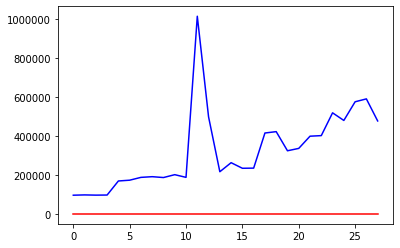

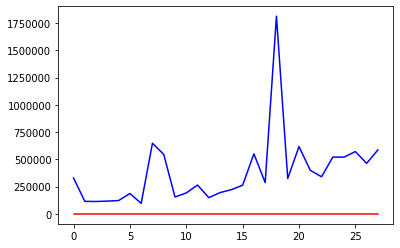

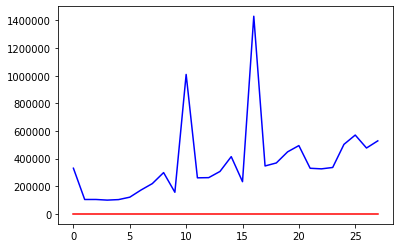

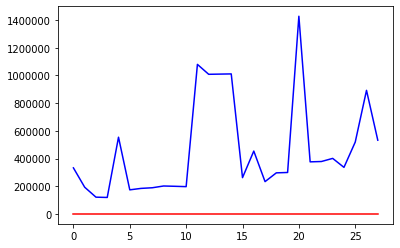

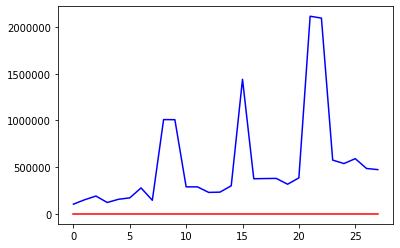

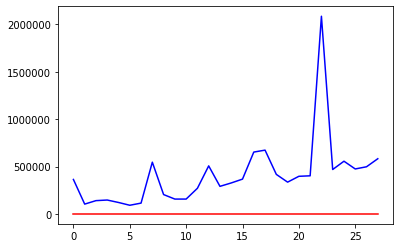

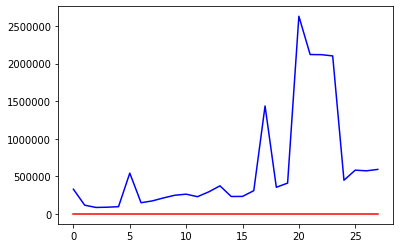

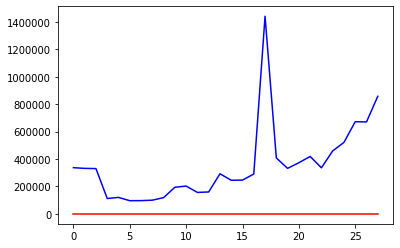

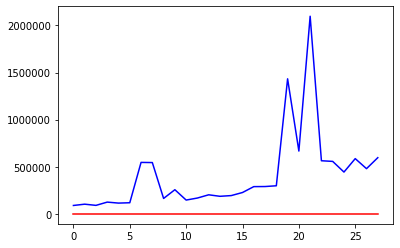

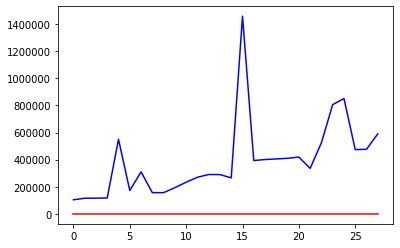

In [47]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(512, input_dim=22, activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(32,  activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(2,  activation='relu'))
model.add(Dense(1, activation='linear'))
print(model.summary())
# compile the keras model
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
r2_scores = []
mse_scores = []
mape_scores = []
mae_scores = []
cv = KFold(n_splits= 10 , random_state=42, shuffle= True)
print(cv)
k = 1
for train_index, test_index in (cv.split(X)):
    print('*******************Fold number************************: ',k)
    k = k+1
    X_train_fold, X_test_fold, Y_train_fold, Y_test_fold = X[train_index], X[test_index], Y[train_index], Y[test_index]
    print(X_train_fold.shape, X_test_fold.shape, Y_train_fold.shape, Y_test_fold.shape)
    # fit the keras model on the dataset
    model.fit(X_train_fold, Y_train_fold, epochs=100, batch_size=10, verbose = 2)
    Y_pred_fold = model.predict(X_test_fold)
    plt.figure()
    plt.plot(Y_test_fold, 'b')
    plt.plot(Y_pred_fold, 'r')
    r2_scores.append(r2_score(Y_test_fold, Y_pred_fold))
    mse_scores.append(mean_squared_error(Y_test_fold, Y_pred_fold))
    mape_scores.append(absolute_percentage_error(Y_test_fold, Y_pred_fold))
    mae_scores.append(mean_absolute_error(Y_test_fold, Y_pred_fold))
print('MSE for 10 folds\n', mse_scores)
print('\nR2 scores for 10 folds\n', r2_scores)
print('\nMAPE for 10 folds\n', mape_scores)
print('\nMean MSE = ', np.mean(mse_scores), '\nMedian MSE = ', np.median(mse_scores))
print('\nMean R2 score =',np.mean(r2_scores), '\nMedian R2 scores = ', np.median(r2_scores))
print('\nMean Absolute Percentage Error =',np.mean(mape_scores), 
      '\nMedian Absolute Percentage Error =', np.median(mape_scores)) 
print('\nMean MAE =',np.mean(mae_scores), 
      '\nMedian MAE =', np.median(mae_scores)) 